<h1 style="text-align:center">
    Causas de muerte en España
</h1>

<hr>



  ### Apellidos: Domínguez Pérez
  ### Nombres: Luis Miguel
  ### Email: Luismigueldp92@gmail.com
  ### Fecha: 16/01/2021
  
  <hr>

## Introducción

En el siguiente documento se trabajará con un csv que recoge las cifras de fallecidos por diverssas causas de muerte a lo largo de aproximadamente 30 años, desde 1980 hasta 2018. Se presentan agrupadas por sexo y rango de edad pero tambien podemos encontrar registros que computan el total agregado de estas categorías. Durante el tratamineto y análisis de los datos se irá comentando todo lo caoncerniente acerca del planteamiento de la tarea y de la planificación. Al final de cada apartado se puede encontrar un pequeña evaluación de lo conseguido así como comentarios acerca de los métodos utilizados y posibles aspectos a mejorar.

El documento ha sido elaborado pensado en la ejecución secuencial por lo que no se recomienda saltar de un apartado a otro. La ejecución secuencial de todo no da absolutamente ningún error. Por favor, si es el caso se debe revisar con cuidado que se hayan ejecutado todos los chunks aprevios al que de error (Especial atención entre los chunks 60 y 61, por la manera que jupyter viaja entre chunks provoca que uno de ellos sea muy facil de dejar sin ejecutar si vamos deprisa).

## a) Lectura básica del archivo csv

En primer lugar vamos a hacer la importación en formato CSV, tras ello se hará en formato Pandas que es el que usaremos a partir de ese momento para gestionar los datos a lo largo del documento.

In [115]:
import csv

def cargar_lineas(nombre, n, m):
    
    """
    Función que importa un archivo csv y muestra por pantalla el rango de filas pedidas.
    
    Parameters
    ----------
    nombre : str
        Nombre del archivo csv a arbir.
    n : int
        Fila inicial del rango a mostrar. La primera fila corresponde al índice 0.
    m: int
        Fila final del rango a mostrar.
        
    Return
    ------
    lista[array[str, str, str, int, int]]
        Una lista compuesta por cada una de las líneas pedidas como arrays.
    
    Example
    -------
    >>> cargar_lineas(ine_mortalidad_espanna, 7, 10)
    
    ['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', '2012', '402.950']
    ['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', '2011', '387.911']
    ['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', '2010', '382.047']
    ['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', '2009', '384.933']
    """

    lista_datos = list(csv.reader(open(nombre, "r"), delimiter=";"))
    
    # Tenemos que solucionar dos problemillas, el primero es que el delimitador coma del csv al importar lo entiende
    # como separador de decimales. Este error ocurre en la varaible Total, que por defecto importa como string. 
    # Solucionamos el problema sustituyendo los caracteres delimitadores de decimales (. tras la importación)
    # por nada y luego casteando el tipo a entero de la siguiente manera:
    
    for i in range(1,len(lista_datos)):
        lista_datos[i][-1] = int(lista_datos[i][-1].replace(".", ""))
        
    # El segundo problema es que importa el año como string, pero lo resolvemos facilmente casteandolo como int.

    for i in range(1,len(lista_datos)):
        lista_datos[i][-2] = int(lista_datos[i][-2])
    
    # Podemos impedir la muestra del header en este proceso de importación
    # sumando 1 a los índices del return. El segundo tiene sumado 2 para incluir esta
    # correción y aparte incluir el último término que le pasamos como argumento m.
    
    return(lista_datos[n+1:m+2])

Probamos la función elaborada cargando las filas desde la 7 hasta las 10, las dos incluidas.

In [116]:
mis_datos = cargar_lineas("ine_mortalidad_espanna.csv", 7, 10)

for dato in mis_datos:
    print(dato)

['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2011, 387911]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2010, 382047]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2009, 384933]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2008, 386324]


Probamos que los tipos están correctos en las dos varables numéricas probando una de las líneas:

In [3]:
for i in range(5):
    print(mis_datos[3][i], type(mis_datos[3][i]))


001-102  I-XXII.Todas las causas <class 'str'>
Total <class 'str'>
Todas las edades <class 'str'>
2008 <class 'int'>
386324 <class 'int'>


Podemos realizar el mismo proceso utilizando los DF de Pandas que será el formato que utilizaremos de ahora en adelante en el proyecto.

In [4]:
import pandas as pd

def cargar_lineas_pd(nombre, n, m):
    
    """
    Función que importa un archivo csv y muestra por pantalla el rango de filas pedidas.
    
    Parameters
    ----------
    nombre : str
        Nombre del archivo csv a arbir.
    n : int
        Fila inicial del rango a mostrar. La primera fila corresponde al índice 0.
    m: int
        Fila final del rango a mostrar.
        
    Return
    ------
    pandas.core.frame.DataFrame (Colección de filas de Pandas DataFrame.)
    
    
    """

    # En este caso, la importación de la columna Periodo se hace como entero automaticamente, pero debido a los
    # delimitadores decimales del csv original, en la columna total nos hace conversiones donde interpreta que
    # la coma, en lugar de separar millares es un punto que separa decimales. Mi manera de solucionarlo es la siguiente.
    
    # Importamos el csv declarando la columna Total como str para que no haga cambios extraños por su cuenta.
    
    DF = pd.read_csv(nombre, delimiter = ";",dtype = {"Total": str})
    
    # Ahora estamos en la situación del apartado anterior y podemos tomar medidas equivalentes.
    # Podemos actuar sobre todos los valores de determinadas columnas.
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF["Total"] = DF["Total"].replace(regex=["\."],value="")
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
    DF = DF.astype({"Causa de muerte":"string", "Sexo":"string", "Edad":"string", "Periodo":"int32","Total": "int64"})
    
        
    return(DF[n:m+1])

In [5]:
datos = cargar_lineas_pd("ine_mortalidad_espanna.csv", 7, 10)
datos

,Causa de muerte,Sexo,Edad,Periodo,Total
7,001-102 I-XXII.Todas las causas,Total,Todas las edades,2011,387911
8,001-102 I-XXII.Todas las causas,Total,Todas las edades,2010,382047
9,001-102 I-XXII.Todas las causas,Total,Todas las edades,2009,384933
10,001-102 I-XXII.Todas las causas,Total,Todas las edades,2008,386324


Podemos ver el tipo de objeto devuelto por la función y comprobar que es un DF:

In [6]:
type(datos)

pandas.core.frame.DataFrame

Hacemos una preview de las filas deseadas:

In [7]:
datos

,Causa de muerte,Sexo,Edad,Periodo,Total
7,001-102 I-XXII.Todas las causas,Total,Todas las edades,2011,387911
8,001-102 I-XXII.Todas las causas,Total,Todas las edades,2010,382047
9,001-102 I-XXII.Todas las causas,Total,Todas las edades,2009,384933
10,001-102 I-XXII.Todas las causas,Total,Todas las edades,2008,386324


Y comprobamos tipos:

In [8]:
datos.dtypes

Causa de muerte    string
Sexo               string
Edad               string
Periodo             int32
Total               int64
dtype: object

Podemos mostrar por pantalla los datos devueltos por la función de csv.reader para ver que a los mismos argumentos les corresponden la misma salida:

In [9]:
mis_datos = cargar_lineas("ine_mortalidad_espanna.csv", 7, 10)

for dato in mis_datos:
    print(dato)

['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2011, 387911]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2010, 382047]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2009, 384933]
['001-102  I-XXII.Todas las causas', 'Total', 'Todas las edades', 2008, 386324]


### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Listas intensionales.
   - Bucles.
   - Librerías externas.
   - Pandas DataFrame.
   
### ¿Se consiguieron los objetivos?

 A mi parecer, definitivamente sí, se han conseguido tanto en la importación del CSV como filas en las que cada una es una lista como en Pandas que para mi gusto es el formato definitivo de manipulación de datos en Python. Los tipos son correctos y las funciones funcionan y devuelven los parámetros adecuados.
 
### Ayuda externa:

 Para la elaboración de este apartado se ha utilizado el contenido encontrado en el curso así como documentación extra conseguida en internet. La ayuda consultada ha sido ante todo para la importación del CSV ya que estoy acostumbrado a trabajar con Pandas.

## b) Dos funciones auxiliares

 A continuación vamos a elaborar dos funciones para su uso posterior durante la práctica.

- b.1) Una primera función convertirá un número romano en un entero.

- b.2) Una segunda función que nos diga qué líneas hacen referencia a categorías agrupadas de causas de muerte.

### b.1) Conversor de dígitos romanos a enteros árabes.

Definimos nuestra función:

In [10]:
def romano_a_entero(num):
    
    """
    Función que transforma string interpretados como números romanos a números enteros desde el 1 hasta el 1000.
        
    Parameters
    ----------
    num : string
        String que representa un número romano.
    
    Returns
    -------
    valor: int
        Equivalente entero al número romano.
    string
        Si el número introducido no es un numeral romano nos lo indicará.
    
    
    Example
    -------
    >>> romano_a_entero("IV")
    4
    >>> romano_a_entero("CXXIX")
    129
    """

    # Definimos un diccionario con los dígitos romanos. Observar que como tienen una lógica aditiva y sustractiva, 
    # es más útil definir los que provienen de lógica sustractiva por separado en el rango 1(I)-1000(M)
    
    romanos = {'IV':4,'IX':9,'XL':40,'XC':90,'CD':400,'CM':900, 'I':1,'V':5,'X':10,'L':50,'C':100,'D':500,'M':1000}
    
    # Inicializamos algunas variables:
    
    i = 0
    valor = 0
    
    # Lanzamos un bucle de lectura, obsérvese el proceso, lee bloques de 2 en dos y determina si ese bloque está en 
    # nuestro diccionario de dígitos, en caso de que lo esté, lo interpreta con el valor indicado por el diccionario
    # y lo añade al valor acumulado previo y continúa con la lectura del string en el valor posterior a ese dígito.
    # Si no lo está, coge únicamente el primero de ellos, lo interpreta, lo añade y continúa desde el siguiente a ese.
    
    # En caso de que un valor de entrada no sea un dígito romano o no figure en el rango de conversión contemplado,
    # nos devuelve un mensaje que nos lo indica.
    
    while i < len(num):
        if num[i:i+2] in romanos:
            valor = valor + romanos[num[i:i+2]]
            i = i+2
            
        else:
            if num[i] in romanos:
                valor = valor + romanos[num[i]]
                i = i+1
            else:
                return("El valor a interpretar no es un número romano o no está en el rango")
            
    return(valor)

Podemos probar nuestra función con alguna colección de valores:

In [11]:
print([(r, romano_a_entero(r)) \
      for r in ["I", "IV", "XIV", "XXXIX", "VL", "LXIV", "MCDXCII", "XXG"]])

[('I', 1), ('IV', 4), ('XIV', 14), ('XXXIX', 39), ('VL', 55), ('LXIV', 64), ('MCDXCII', 1492), ('XXG', 'El valor a interpretar no es un número romano o no está en el rango')]


### b.2) Detector de categorías de muertes agrupadas.

Las condiciones que debe cumplir nuestra función son las siguientes:

Estas líneas empiezan por tres  dígitos, seguidos por un guion y otros tres dígitos:

        001-008 I.Enfermedades infecciosas y parasitarias Hombres De 65 a 69 años 2001 305

También hay algunas líneas que totalizan **todas** las causas:

        001-102 I-XXII.Todas las causas Mujeres De 10 a 14 años 1983 308

Nos interesan las primeras, pero no las segundas.

La función debe detectar filas cuyo valor en la columna "Causa de muerte" cumpla las siguiente condiciones:

        - Empieza por tres dígitos, seguidos por un guion y otros tres dígitos.
        - No totaliza **todas** las causas de fallecimiento.
        
Algunas de las categorías de muertes figuran de la siguiente manera:

        082  XVI.Afecciones originadas en el periodo perinatal
        
Estas categorías no cumplen las condiciones previas y, por lo tanto, no serán incluidas. En apartados posteriores del proyecto se nos pide incluirlas para la elaboración de cierto diccionario por lo que se utilizará una modificación de esta misma función de comprobación. 

Utilizaremos funciones regulares del paquete "re" para hacer estas comprobaciones.

Vamos allá:

In [12]:
import re

def es_grupo_y_no_total(causa):
    
    """
    Función que comprueba si un determinado string cumple las siguientes condiciones:
    
       - Empieza por tres dígitos, seguidos por un guion y otros tres dígitos.
       - No totaliza **todas** las causas de fallecimiento.
    
    Que quedan sintetizadas en las varaibles "patron" y "patron2" definidas durante la función.
        
    Parameters
    ----------
    causa : string
        String con la causa de muerte, a analizar para ver si cumple las condiciones.
    
    Returns
    -------
    Un valor boolean indicando si cumple las condiciones (True) o no (False).
    
    
    Example
    -------
    >>> es_grupo_y_no_total("001-008 I.Enfermedades infecciosas y parasitarias")
    True
    >>> es_grupo_y_no_total("001-102 I-XXII.Todas las causas Mujeres De 10 a 14 años 1983 308")
    False
    >>> es_grupo_y_no_total("XV.Embarazo")
    False
    """
    
    # Definimos nuestras expresiones a reconocer, la primera es una expresión regular que quiere decir:
    # 3 dígitos, seguidos por un guión y otros 3 dígitos.

    patron = "\d{3}-\d{3}"
    patron2 = "Todas las causas"

    # Lanzamos un bucle que busca, en primer lugar, si el string comienza con el patrón: "\d{3}-\d{3}".
    # En caso de que lo cumpla, comprueba si el string contiene el string prohibido: "Todas las causas".
    
    if re.match(patron, causa) != None:
        
        if re.search(patron2, causa) != None:
            return(False)
    
        else:
            return(True)

    else:
        return(False)

Podemos realizar comprobaciones de esta función con diferentes strings que podríamos en contrar en la columna "Causas de muerte" de nuestro DF:

In [13]:
lista_de_causas = [
    "009-041  II.Tumores",
    "009  Tumor maligno del esófago",
    "001-102  I-XXII.Todas las causas",
    "077-080  XIV.Enfermedades del sistema genitourinario",
    "082  XVI.Afecciones originadas en el periodo perinatal",
    "050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos"
]

for causa in lista_de_causas:
    print(causa.ljust(80), "\t", es_grupo_y_no_total(causa))

009-041  II.Tumores                                                              	 True
009  Tumor maligno del esófago                                                   	 False
001-102  I-XXII.Todas las causas                                                 	 False
077-080  XIV.Enfermedades del sistema genitourinario                             	 True
082  XVI.Afecciones originadas en el periodo perinatal                           	 False
050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos 	 True


Al poner a trabajar esta función con una lista de strings, como por ejemplo, la columna "Causas de muerte" de nuestro DataFrame con el que estamos trabajando, podremos elaborar una lista de valores booleanos de la misma longitud que nos permita utilizarla como máscara para filtrar y seleccionar las filas que cumplan la condición. Esto se realizará en el siguiente apartado, por lo que considero que no es necesario realizar más ejemplos de prueba de momento.

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Expresiones regulares.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Librerías externas.
   
### ¿Se consiguieron los objetivos?

 Las dos funciones trabajan de manera correcta, se han elaborado de una manera sencilla y utilizando contenido visto durante el curso como expresiones regulares. Tienen los parámetros que se piden y devuelven el resultado requerido con sus respectivos return. Creo que el apartado se ha llevado a cabo satisfactoriamente y no veo ningún motivo para que no opte a la nota máxima.
 
### Ayuda externa:

 Para la elaboración de este apartado se ha usado tanto la documentación encontrada en el curso como en internet, principalmente sobre expresiones regulares y su utilización ya que este curso ha sido mi introducción a ellas, que por otra parte, he encontrado tremendamente útiles e interesantes. Durante el resto del documento se vuelven a utilizar en cada ocasión donde es posible.

## c) Carga selectiva de grupos de enfermedades


Como observamos antes en la sección sobre la estructura de la columna "Causa de muerte", tenemos causas agrupadas, y en concreto las que queremos seleccionar vienen marcadas por las siguientes características:

⦁	Empieza por tres dígitos, seguidos por un guion y otros tres dígitos.

⦁	No totaliza todas las causas de fallecimiento.

La función de selección a utilizar será la elaborada en el apartado anterior y por lo tanto no se profundizará en explicaciones acerca de ella, ya que las podemos encontrar en el notebook correspondiente al apartado b.

Como ya se citó anteriormente, algunas causas de muerte, como "082  XVI.Afecciones originadas en el periodo perinatal" son dejadas de momento fuera por la siguiente función de selección, aunque en apartados posteriores la necesitaremos por tanto le haremos alguna modificación para que la incluya.

Aparte de cargar las filas deseadas, queremos cambiar el formato en el que se muestran para que las columnas representadas sean las siguientes:

    - Código numérico, que incluye los índices en arabescos y el numeral romano.
    - Numeral romano correspondiente al código numérico anterior.
    - Numeral árabe correspondiente a la traducción del numeral romano previo.
    - Nombre del grupo, sin códigos numéricos de ningún tipo, tan solo el nombre.
    - Año correspondiente al periodo temporal de los datos de esa fila.
    - Total de fallecimientos durante ese periodo debido a ese grupo de causas.
    
Con todo ello en mente, las funciones previamente definidas que vamos a utilizar son, la que reconoce si la causa de muerte de una de las filas se corresponde con una de las agrupadas, definida en el apartado b.2, un traductor de numerales romanos a árabes enteros, que se definió en el apartado b.1, una función que nos permite hacer determinadas divisiones de los strings de la columna "Causa de muerte" para poder separarlos en las columnas deseadas.

Vamos allá.

------------------------------------

Tenemos nombres con el siguiente formato: "077-080  XIV.Enfermedades del sistema genitourinario".

Durante la función de importación que elaboramos tras esta siguiente función a definir y que es la función principal que contiene estas subfunciones que hemos definido previamente vamos a hacer en un determinado momento una operación con estos strings que los divide utilizando como referencia el caracter ".".

La parte de la derecha la guardará para que figure en una columna de nombres de grupos, que figurará en el DataFrame final. La parte de la izquierda, que en nuestro caso sería de la forma: "077-080  XIV", la asignará a la columna código numérico, que también figura en el DataFrame final. Para elaborar las columnas de numeral romano y numeral árabe, necesitamos coger sólo la parte en numerales romanos de esta columna "código numérico", y esto exactamente es lo que hace la función que introducimos y explicamos a continuación.

Como en el ejemplo se nos pide que los numerales romanos que encontremos como VI-VIII los traduzcamos sólo a partir del primero de ellos (VI = 6), se selecciona únicamente la primera ocurrencia de este tipo de patrón encontrada en el string a analizar por la función.

In [14]:
def romano(string):
    
    """
    Función que toma un string con números y letras en mayúsculas y extrae de él la primera
    secuencia de caracteres consecutivos en mayúsculas que encuentra.
        
    Parameters
    ----------
    string : string
        String que representa un código numérico con números árabes seguidos de numerales romanos.
    
    Returns
    -------
    palabra: string
        Primera coincidencia de string que compongan un numeral romano en la secuencia de entrada.
    None
        En caso de no encontrar un numeral romano (Secuencia de letras en mayúsculas).
    
    
    Example
    -------
    >>> romano("678-123 XXV")
    XXV
    >>> romano("1234 CXXIX")
    CXXIX
    >>> romano("1234 X-XV")
    X
    >>> romano("1234")
    None
    """
    
    # Utilizamos la función search, el primer argumento es una expresión regular que indica que busque secuencias de
    # letras de la A a la Z en mayúsculas, el segundo indica el string en el que buscar. En caso de no encontrar resultados
    # devuelve None, si los encuentra devuelve la secuencia encontrada. (Esta función genera una salida que nos da los
    # índices de la secuencia encontrada y la secuencia encontrada. La manera que he encontrado de guardar la secuencia
    # es con la función group, en este caso con el argumento 0 para que sea el primer grupo que es el único que
    # encuentra ya que search solo guarda la primera ocurrencia.
    # Posiblemente existan métodos más elegantes de hacerlo, pero este me funciona y no parece generar problemas
    # de rendimiento.)
    
    if re.search("[A-Z]+", string) == None:
        return(None)
    else:
        palabra = re.search("[A-Z]+", string).group(0)
        return(palabra)

Podemos poner a prueba nuestra función:

In [15]:
lista = ["234-54 CV", "444-555 XXXI", "1234 CXXIX", "1234 X-XV", "1234"]

for i in lista:
    print(i+"--->", romano(i))

234-54 CV---> CV
444-555 XXXI---> XXXI
1234 CXXIX---> CXXIX
1234 X-XV---> X
1234---> None


Vamos a elaborar la función principal de este apartado. Podemos resumir sus funciones de la siguiente manera:
    
   ⦁ El parámetro de entrada será el nombre del csv que deseamos importar.
   
   ⦁ Importar el csv con los datos de manera que los campos inciales vengan bien tipados, es decir, importe los string como tal y haga las transformaciones necesarias de los campos numéricos para que se traten correctamente como enteros.
   
   ⦁ Seleccione solo las filas de este DF que hagan referencia a causas de muerte agrupadas, para lo que utilizaremos a función "es_grupo_y_no_total" definida previamente.
   
   ⦁ A partir del campo "Causa de muerte" haga una división en dos columnas, una con los nombres de las causas que figurará en el DF de salida y otra con los códigos de las causas que también figurará.
   
   ⦁ Seleccione la parte correspondiente al numeral romano del código numérico y lo separe en otra columna, tras esto, traducir los numerales presentes en esta a enteros árabes que figurarán en otra columna. Esas dos columnas están presentes en el DF final.
   
   ⦁ Vamos a eliminar las columnas con información sobre el rango de edades y los sexos para que no aparezcan en el DF de salida ya que no son requeridos.
    
Todos estos pasos serán debidamente detallados con comentarios en el código de definición de la función que se expone a continuación:

In [16]:
import re
import pandas as pd

def cargar_datos_mod(nombre_csv):
    
    """
    Función que toma como argumento el nombre del csv a importar y devuelve un PandasDF con las columnas:
       ("Código", "Num.romano", "Num.árabe", "Nombre", "Periodo", "Total").
       
       - "Código"(str): Código numérico de la causa de muerte con numerales índices enteros más romanos.
       - "Num.romano"(str): Parte correspondiente al numeral romano del "Código".
       - "Num.árabe"(int): Parte correspondiente al numeral árabe del "Código".
       - "Nombre"(str): Nombre de la causa de muerte, sin numerales.
       - "Periodo"(int): Año que referencia el periodo temporal de la magnitud "Total".
       - "Total"(int): Total de fallecimientos en el periodo dado por la causa correspondiente.
       
    Adicionalmente devuelve un parámetro denominado "eliminadas" que se corresponde con el número de filas del DF
    original que no pasaron el filtro de la función "es_grupo_y_no_total" y por lo tanto no figuran en el DF final.
        
    Parameters
    ----------
    nombre_csv : string
        String que representa el nombre del csv a importar.
    
    Returns
    -------
    (DF_limpio, eliminadas): (string, int)
        DF_limpio: Un PandasDF que contiene las columnas detalladas anteriormente.
        eliminadas: Número de filas que figuraban en el DF original menos las del DF final.
    
    """
    
    # Comenzamos cargando el csv y definiendo los tipos adecuadamente como ya se vio en el apartado a).
    
    
    DF_sucio = pd.read_csv(nombre_csv, delimiter = ";",dtype = {"Total": str})
    
    DF_sucio["Total"] = DF_sucio["Total"].replace(regex=["\."],value="")
    
    DF_sucio = DF_sucio.astype({"Causa de muerte":"string",
                                "Sexo":"string",
                                "Edad":"string",
                                "Periodo":"int32",
                                "Total": "int64"})
    
    # Elaboramos una lista con las causas de muerte a partir de la correspondiente columna para pasarla de argumento
    # a la función que elaborará la máscara "es_grupo_y_no_total" que fue definida en el apartado b2).
    
    lista = DF_sucio["Causa de muerte"]
    
    cond = [(es_grupo_y_no_total(i)) for i in lista]
    
    # Utilizamos esta máscara para quedarnos solo con las líneas deseadas. El proceso es sencillo, ya que la máscara tiene
    # una logitud similar a la de la columna "Causa de muerte", ya que ha sido elaborada pasando cada elemento de
    # esta columna como argumento a la función "es_grupo_y_no_total" secuencialmente. Ya comentamos que este sería el 
    # proceso a seguir y el objetivo final de la función elaborada en el apartado 2b).
    
    DF_limpio = DF_sucio[cond]
    
    # Creamos dos listas vacías listas para llenarlas con el siguiente bucle, contendrán los elementos que van a figurar
    # en las columnas 
    
    Numeral = []
    Strings = []
    
    # Utilizamos la función split para separar el contenido de la primera columna DF_limpio.iloc[i,0] secuencialmente
    # en dos partes que figuran en una lista, la primera es la parte (lista[0]) numérica del código que figurará en 
    # la columna "Código" y la segunda (lista[1]) es la parte del nombre del código que irá a la columna "Nombre".
    # El proceso se hace añadiendo cada uno de los elementos de estos pares a sus respectivas listas, Numeral y Strings
    # definidas previamente y tras estar estas completamente construidas se asignarán a sus respectivas columnas del DF.
    # El split se hace tomando como caracter de separación ".", y como es un caracter reservado tenemos que denotarlo 
    # como "\."
    
    
    for i in range(len(DF_limpio)):
        lista = re.split("\.", DF_limpio.iloc[i,0])
        
        Numeral.append(lista[0])
        Strings.append(lista[1])
        
    DF_limpio["Código"] = Numeral
    DF_limpio["Nombre"] = Strings
    
    # Ahora aplicamos la función "romano" definida y explicada previamente para separar la parte correspondiente al numeral romano
    # de la columna "Código". Guardamos los resultados en una nueva columna "Num.romano".
        
    DF_limpio["Num.romano"] = [romano(i) for i in DF_limpio["Código"]]
    
    # Y traducimos la columna "Num.romano" a valores enteros y los guardamos en la columna "Num.árabe".
    
    DF_limpio["Num.árabe"] = [romano_a_entero(i) for i in DF_limpio["Num.romano"]]
    
    # Hacemos el drop (eliminamos) las columnas que no son necesarias del DF original. La función drop en nuestro caso
    # toma como argumento el nombre de la columna y el eje en el que operar.
    
    DF_limpio.drop("Sexo", axis=1)
    DF_limpio.drop("Edad", axis=1)
    
    # Hacemos drop también de esta columna antigua que ya hemos descompuesto.
    
    DF_limpio.drop("Causa de muerte", axis=1)
    
    # Reordenamos las columnas que siguen presentes para que aparezcan en el orden deseado.
    
    DF_limpio = DF_limpio.reindex(columns = ["Código", "Num.romano", "Num.árabe", "Nombre", "Periodo", "Total"])
    
    # E imponemos los tipos para asegurarnos de que el DF tiene el formato y forma que deseamos.
    
    DF_limpio = DF_limpio.astype({"Código":"string",
                                  "Num.romano":"string",
                                  "Num.árabe":"int32",
                                  "Nombre":"string",
                                  "Periodo":"int32",
                                  "Total":"int64"})
    
    # Computamos el total de filas eliminadas por el proceso de filtrado con "es_grupo_y_no_total"
        
    eliminadas = (len(DF_sucio)-len(DF_limpio))

    return(DF_limpio, eliminadas)

Ha llegado el momento de probar nuestra función de importación. He incluido una función para eliminar warnings en el siguiente chunk ya que considera peligrosas hacer operaciones del tipo:

    - DF_limpio["Código"] = Numeral
    - DF_limpio["Num.romano"] = [romano(i) for i in DF_limpio["Código"]]
    
En las que estamos copiando el contenido de una lista directamente en una columna (aunque la hemos creado expresamente para ello). De cualquier manera, el resultado es bueno, como podremos ver en las comprobaciones, y la alternativa que se presenta a esta operación, que el propio warning nos aconseja es extremadamente lenta trabajando con DataFrames e incurre en una tremenda penalización al rendimiento. A continuación muestro cómo sería la operación de elaboración de las columnas con la solución sugerida:

    for i in range(len(DF_limpio)):
        
        lista = re.split("\.", DF_limpio.iloc[i,0])
        
        DF_limpio.loc[i, "Código"] = lista[0]
        DF_limpio.loc[i, "Nombre"] = lista[1]

Como ya he comentado, esa operación, aunque es la sugerida y daría el mismo resultado, es extremedamente costosa en términos de rendimiento y por lo tanto es descartada.

In [17]:
import warnings
warnings.filterwarnings('ignore')

datos, num_lin_descartadas = cargar_datos_mod("ine_mortalidad_espanna.csv")

Tras ejecutar la función, podemos consultar nuestro DF:

In [18]:
datos

,Código,Num.romano,Num.árabe,Nombre,Periodo,Total
2574,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2018,6398
2575,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2017,6819
2576,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2016,7033
2577,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2015,7567
2578,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2014,6508
...,...,...,...,...,...,...
267691,090-102 XX,XX,20,Causas externas de mortalidad,1984,52
267692,090-102 XX,XX,20,Causas externas de mortalidad,1983,60
267693,090-102 XX,XX,20,Causas externas de mortalidad,1982,61
267694,090-102 XX,XX,20,Causas externas de mortalidad,1981,63


Podemos consultar el número de líneas que han quedado y las que han sido descartadas con respecto al DF original:

In [19]:
print("Número de líneas eliminadas:", num_lin_descartadas)
print("Longitud del DF final:", len(datos))

Número de líneas eliminadas: 265122
Longitud del DF final: 36036


Podemos consultar algunas de las filas:

In [20]:
datos.iloc[[34, 1001, 13000, 20000, 25000]]

,Código,Num.romano,Num.árabe,Nombre,Periodo,Total
2608,001-008 I,I,1,Enfermedades infecciosas y parasitarias,1984,3232
3575,001-008 I,I,1,Enfermedades infecciosas y parasitarias,1992,16
141700,050-052 VI-VIII,VI,6,Enfermedades del sistema nervioso y de los órg...,2005,19
179588,062-067 X,X,10,Enfermedades del sistema respiratorio,1986,31
215476,074-076 XIII,XIII,13,Enfermedades del sistema osteomuscular y del t...,2017,0


Como podemos ver, todas las columnas presentanlos valores esperados, los split se han hecho adecuadamente, las traducciones de numerales también, por lo que podemos concluir que a pesar de los warning todo se ha llevado a cabo adecuadamente.

Por seguir comprobando podemos hacer algo de este estilo, mostrando los diferentes valores para el nombre con sus respectivos valores de las demás columnas asociada para esa fila y así comprobar que, por lo general, todas las traducciones y particiones de datos se han realizado adecuadamente independientemente de la categoría del grupo de enfermedades.

In [21]:
datos.drop_duplicates(["Nombre"])[["Código", "Num.romano", "Num.árabe", "Nombre"]]

,Código,Num.romano,Num.árabe,Nombre
2574,001-008 I,I,1,Enfermedades infecciosas y parasitarias
25740,009-041 II,II,2,Tumores
113256,042-043 III,III,3,Enfermedades de la sangre y de los órganos hem...
120978,044-045 IV,IV,4,"Enfermedades endocrinas, nutricionales y metab..."
128700,046-049 V,V,5,Trastornos mentales y del comportamiento
141570,050-052 VI-VIII,VI,6,Enfermedades del sistema nervioso y de los órg...
151866,053-061 IX,IX,9,Enfermedades del sistema circulatorio
177606,062-067 X,X,10,Enfermedades del sistema respiratorio
195624,068-072 XI,XI,11,Enfermedades del sistema digestivo
213642,074-076 XIII,XIII,13,Enfermedades del sistema osteomuscular y del t...


Una comprobación sencillita de que aparecen todos los años y no se ha colado ningún valores extraño tampoco está de más.

In [22]:
datos.drop_duplicates(["Periodo"])[["Periodo"]]

,Periodo
2574,2018
2575,2017
2576,2016
2577,2015
2578,2014
2579,2013
2580,2012
2581,2011
2582,2010
2583,2009


Por último, aunque los fijamos expresamente durante la función y no debería haber ocurrido nada extraño, podemos consultar los tipos de nuestros datos:

In [23]:
datos.dtypes

Código        string
Num.romano    string
Num.árabe      int32
Nombre        string
Periodo        int32
Total          int64
dtype: object

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones. Algunas de ellas devuelven varios valores que es una utilidad que aún no se abía utilizado en el documento.
   - Se utilizan funciones de primer y segundo orden (funciones embebidas).
   - Seguimos utilizado y profundizando en las expresiones regulares.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   - Librerías externas.
   - Tipado explícito de variables cuando es necesario.
   
### ¿Se consiguieron los objetivos?

 Este apartado no ha sido trivial, había que implementar la utilización de las funciones elaboradas previamente así como de alguna nueva, incluso la comprensión en sí del objetivo del apartado podía traer problemas. Creo que el resultado final es más que satisfactorio. Todas las funcionalidades que se pedían están disponibles, todas las reglas sobre cómo se debían conseguir estos objetivos han sido seguidas y se han utilizado extensivamente las técnicas vistas durante el curso. Las funciones trabajan correctamente, son sólidas, compactas dentro de lo posible y rápidas. El formato y los tipos de todos los resultados es el adecuado y lo que considero más importante de todo: El contenido ha sido explicado punto por punto detalladamente, tanto para dar conocimiento del planteamiento de la tarea por parte del programador como para ir detallando y despiezando cada fragmento del código utilizado y facilitar la comprensión del lector. En general me siento bastante orgulloso del resultado aunque comprendo que a ojos de un programador con mucha más experiencia podría ser optimizable.
 
### Ayuda externa:

 Para la elaboración de este apartado se ha usado tanto la documentación encontrada en el curso como en internet, todo dentro de las consultas habituales del programador que no puede tener todas las funciones de todos los paquetes en la cabeza. Se ha consultado ante todo contenido sobre comandos con expresiones regulares y algunas instrucciones más especiales de Pandas DF como reindex o el tipado de una serie de variables.

## d) Vamos a elaborar dos diccionarios diferentes:


El primero de ellos tendrá una estructura clave-valor donde la clave es un número romano del código numérico correspondiente y el valor es una de las causas de muerte agrupadas, donde ahora se incluirán las qua antes quedaban descartadas como: 
"082  XVI.Afecciones originadas en el periodo perinatal"

El segundo tendrá una clave que sea una cuaterna: El número de la causa de la muerte según la descripción anterior, el sexo, el rango de edad y el año, como un entero. El valor asociado será el número de fallecimientos de esas causas, sexo, rango de edad y año.

El dataframe utilizado es como el utilizado en el apartado anterior pero incluyendo causas extra de muerte agrupadas como la citada anteriormente y con las columnas con información de edad y sexo presentes.

------------------------------------------------------------------------------------------------------------------------

Vamos a comenzar modificando la función definida previamente "es_grupo_y_no_total".

Ahora tiene que incluir otras filas y por lo tanto vamos a utilizar otra condición para el filtrado, que en este caso va a ser:

   - Que aparezca un punto en algún momento del nombre de la causa de muerte.
   
   - Que no aparezca el string "Todas las causas" en el nombre de la causa de muerte.


Hemos quitado la restricción de que aparezcan formaciones: tres dígitos guión tres dígitos. Por lo demás, la función es exactamente igual.

In [24]:

def es_grupo_y_no_total(causa):
    
    """
    Función que comprueba si un determinado string cumple las siguientes condiciones:
    
       - El nombre contiene un caracter "." en algún momento.
       - No totaliza **todas** las causas de fallecimiento.
    
    Que quedan sintetizadas en las varaibles "patron" y "patron2" definidas durante la función.
        
    Parameters
    ----------
    causa : string
        String con la causa de muerte, a analizar para ver si cumple las condiciones.
    
    Returns
    -------
    Un valor boolean indicando si cumple las condiciones (True) o no (False).
    
    
    Example
    -------
    >>> es_grupo_y_no_total("001-008 I.Enfermedades infecciosas y parasitarias")
    True
    >>> es_grupo_y_no_total("001-102 I-XXII.Todas las causas Mujeres De 10 a 14 años 1983 308")
    False
    >>> es_grupo_y_no_total("XV.Embarazo")
    True
    """
    
    # Definimos nuestras expresiones a reconocer, la primera es una expresión regular que quiere decir:
    # Contiene un caracter punto ".", como es un caracter reservado hay que denotarlo con "\.".

    patron = "\."
    patron2 = "Todas las causas"

    # Lanzamos un bucle que busca, en primer lugar, si el string contiene un punto ".".
    # En caso de que lo cumpla, comprueba si el string contiene el string prohibido: "Todas las causas".
    # Hay filas que contienen puntos suspensivos, son las que hacen referencia al VIH, para que no se cuelen
    # imponemos una condición expresamente para ello en nuestro filtro.
    
    if re.search(patron, causa)!=None:
        
        if re.search(patron2, causa)!=None:
            return(False)
    
        else:
            if re.search("VIH", causa)!=None:
                return(False)
            else:
                return(True)

    else:
        return(False)

Vamos a elborar nuestro diccionario a partir de un DF de partida que es igual que el del apartado anterior pero con las ligeras modificaciones ya citadas, por lo tanto necesitamos utilizar de nuevo dos funciones que ya hemos definido previamente, romano_a_entero y romano.

El funcionamiento de estas funciones ha sido aclarado detalladamente en apartados previos ("romano_a_entero": 2a), "romano":3)) y por lo tanto NO van a ser detalladas en este apartado, por favor, para obtener documentación acerca de ellas consultar los apartados indicados.

Volvemos a ejecutar la función de importación con las funciones modificadas.

In [25]:

def cargar_datos_mod(nombre_csv):
    
    """
    Función que toma como argumento el nombre del csv a importar y devuelve un PandasDF con las columnas:
       ("Código", "Num.romano", "Num.árabe", "Nombre", "Periodo", "Sexo", "Edad", "Total").
       
       - "Código"(str): Código numérico de la causa de muerte con numerales índices enteros más romanos.
       - "Num.romano"(str): Parte correspondiente al numeral romano del "Código".
       - "Num.árabe"(int): Parte correspondiente al numeral árabe del "Código".
       - "Nombre"(str): Nombre de la causa de muerte, sin numerales.
       - "Periodo"(int): Año que referencia el periodo temporal de la magnitud "Total".
       - "Sexo"(str): Sexo de los fallecidos en esa categoría.
       - "Edad"(str): Intervalo de edades de los fallecidos
       - "Total"(int): Total de fallecimientos en el periodo dado por la causa correspondiente.
       
    Adicionalmente devuelve un parámetro denominado "eliminadas" que se corresponde con el número de filas del DF
    original que no pasaron el filtro de la función "es_grupo_y_no_total" y por lo tanto no figuran en el DF final.
        
    Parameters
    ----------
    nombre_csv : string
        String que representa el nombre del csv a importar.
    
    Returns
    -------
    (DF_limpio, eliminadas): (string, int)
        DF_limpio: Un PandasDF que contiene las columnas detalladas anteriormente.
        eliminadas: Número de filas que figuraban en el DF original menos las del DF final.
    
    """
    
    # Comenzamos cargando el csv y definiendo los tipos adecuadamente como ya se vio en el apartado a).
    
    
    DF_sucio = pd.read_csv(nombre_csv, delimiter = ";",dtype = {"Total": str})
    
    DF_sucio["Total"] = DF_sucio["Total"].replace(regex=["\."],value="")
    
    DF_sucio = DF_sucio.astype({"Causa de muerte":"string",
                                "Sexo":"string",
                                "Edad":"string",
                                "Periodo":"int32",
                                "Total": "int64"})
    
    # Elaboramos una lista con las causas de muerte a partir de la correspondiente columna para pasarla de argumento
    # a la función que elaborará la máscara "es_grupo_y_no_total" que fue definida en el apartado b2).
    
    lista = DF_sucio["Causa de muerte"]
    
    cond = [(es_grupo_y_no_total(i)) for i in lista]
    
    # Utilizamos esta máscara para quedarnos solo con las líneas deseadas. El proceso es sencillo, ya que la máscara tiene
    # una logitud similar a la de la columna "Causa de muerte", ya que ha sido elaborada pasando cada elemento de
    # esta columna como argumento a la función "es_grupo_y_no_total" secuencialmente. Ya comentamos que este sería el 
    # proceso a seguir y el objetivo final de la función elaborada en el apartado 2b).
    
    DF_limpio = DF_sucio[cond]
    
    # Creamos dos listas vacías listas para llenarlas con el siguiente bucle, contendrán los elementos que van a figurar
    # en las columnas 
    
    Numeral = []
    Strings = []
    
    # Utilizamos la función split para separar el contenido de la primera columna DF_limpio.iloc[i,0] secuencialmente
    # en dos partes que figuran en una lista, la primera es la parte (lista[0]) numérica del código que figurará en 
    # la columna "Código" y la segunda (lista[1]) es la parte del nombre del código que irá a la columna "Nombre".
    # El proceso se hace añadiendo cada uno de los elementos de estos pares a sus respectivas listas, Numeral y Strings
    # definidas previamente y tras estar estas completamente construidas se asignarán a sus respectivas columnas del DF.
    # El split se hace tomando como caracter de separación ".", y como es un caracter reservado tenemos que denotarlo 
    # como "\."
    
    
    for i in range(len(DF_limpio)):
        lista = re.split("\.", DF_limpio.iloc[i,0])
        
        Numeral.append(lista[0])
        Strings.append(lista[1])
        
    DF_limpio["Código"] = Numeral
    DF_limpio["Nombre"] = Strings
    
    # Ahora aplicamos la función "romano" definida y explicada previamente para separar la parte correspondiente al numeral romano
    # de la columna "Código". Guardamos los resultados en una nueva columna "Num.romano".
        
    DF_limpio["Num.romano"] = [romano(i) for i in DF_limpio["Código"]]
    
    # Y traducimos la columna "Num.romano" a valores enteros y los guardamos en la columna "Num.árabe".
    
    DF_limpio["Num.árabe"] = [romano_a_entero(i) for i in DF_limpio["Num.romano"]]
    
    
    # Hacemos drop también de esta columna antigua que ya hemos descompuesto.
    
    DF_limpio.drop("Causa de muerte", axis=1)
    
    # Reordenamos las columnas que siguen presentes para que aparezcan en el orden deseado.
    
    DF_limpio = DF_limpio.reindex(columns = ["Código", "Num.romano", "Num.árabe", "Nombre", "Periodo","Sexo","Edad", "Total"])
    
    # E imponemos los tipos para asegurarnos de que el DF tiene el formato y forma que deseamos.
    
    DF_limpio = DF_limpio.astype({"Código":"string",
                                  "Num.romano":"string",
                                  "Num.árabe":"int32",
                                  "Nombre":"string",
                                  "Periodo":"int32",
                                  "Sexo":"string",
                                  "Edad":"string",
                                  "Total":"int64"})
    
    # Computamos el total de filas eliminadas por el proceso de filtrado con "es_grupo_y_no_total"
        
    eliminadas = (len(DF_sucio)-len(DF_limpio))

    return(DF_limpio, eliminadas)

A continuación ejecutamos la función e importamos nuestros datos.
La razón del siguiente warning está detallada en el apartado 3).

In [26]:
import warnings
warnings.filterwarnings('ignore')

datos, num_lin_descartadas = cargar_datos_mod("ine_mortalidad_espanna.csv")

Las filas incluidas y las que quedaron fuera:

In [27]:
print("Número de líneas eliminadas:", num_lin_descartadas)
print("Longitud del DF final:", len(datos))

Número de líneas eliminadas: 257400
Longitud del DF final: 43758


Y tenemos nuestros datos correctamente enfrascados en un PandasDF, con las columnas apropiadas.

In [28]:
datos

,Código,Num.romano,Num.árabe,Nombre,Periodo,Sexo,Edad,Total
2574,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2018,Total,Todas las edades,6398
2575,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2017,Total,Todas las edades,6819
2576,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2016,Total,Todas las edades,7033
2577,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2015,Total,Todas las edades,7567
2578,001-008 I,I,1,Enfermedades infecciosas y parasitarias,2014,Total,Todas las edades,6508
...,...,...,...,...,...,...,...,...
267691,090-102 XX,XX,20,Causas externas de mortalidad,1984,Mujeres,95 y más años,52
267692,090-102 XX,XX,20,Causas externas de mortalidad,1983,Mujeres,95 y más años,60
267693,090-102 XX,XX,20,Causas externas de mortalidad,1982,Mujeres,95 y más años,61
267694,090-102 XX,XX,20,Causas externas de mortalidad,1981,Mujeres,95 y más años,63


Consultamos tipos que nunca está de más:

In [29]:
datos.dtypes

Código        string
Num.romano    string
Num.árabe      int32
Nombre        string
Periodo        int32
Sexo          string
Edad          string
Total          int64
dtype: object

Y estamos en plenas condiciones de elaborar nuestros diccionarios, así que vamos a ello:

### Diccionario 1:

Lo voy a plantear de la siguiente manera: 
    
Queremos un diccionario que contenga como claves los numerales arábigos de cada grupo de causas y como valor el nombre de la causa en sí, por lo que vamos a elaborar un DF que enumere los diferentes nombres de causas junto a sus correspondientes arábigos.

In [30]:
aux_DF=datos.drop_duplicates(["Nombre"])[["Num.árabe", "Nombre"]]
aux_DF

,Num.árabe,Nombre
2574,1,Enfermedades infecciosas y parasitarias
25740,2,Tumores
113256,3,Enfermedades de la sangre y de los órganos hem...
120978,4,"Enfermedades endocrinas, nutricionales y metab..."
128700,5,Trastornos mentales y del comportamiento
141570,6,Enfermedades del sistema nervioso y de los órg...
151866,9,Enfermedades del sistema circulatorio
177606,10,Enfermedades del sistema respiratorio
195624,11,Enfermedades del sistema digestivo
211068,12,Enfermedades de la piel y del tejido subcutáneo


Como quedan algunos huecos vacíos, por ejemplo, del 6 salta al 9 o del 18 al 20, vamos a hacer manualmente un par de sustituciones:

In [31]:
# Casteamos la columna Num.árabe como strings, ya que este DF es auxiliar y solo nos sirve para elaborar claves, como en
# este caso queremos introducir un guión no queda más remedio que hacerlo como string.

aux_DF = aux_DF.astype({"Num.árabe":"string",
                        "Nombre":"string"})

# Hacemos las sustituciones requeridas en las columnas requeridas, sencillo y claro.
                        
aux_DF["Num.árabe"] = aux_DF["Num.árabe"].replace("6", "6-8")
aux_DF["Num.árabe"] = aux_DF["Num.árabe"].replace("18", "18-19")

In [32]:
aux_DF

,Num.árabe,Nombre
2574,1,Enfermedades infecciosas y parasitarias
25740,2,Tumores
113256,3,Enfermedades de la sangre y de los órganos hem...
120978,4,"Enfermedades endocrinas, nutricionales y metab..."
128700,5,Trastornos mentales y del comportamiento
141570,6-8,Enfermedades del sistema nervioso y de los órg...
151866,9,Enfermedades del sistema circulatorio
177606,10,Enfermedades del sistema respiratorio
195624,11,Enfermedades del sistema digestivo
211068,12,Enfermedades de la piel y del tejido subcutáneo


Y ahora componemos nuestro diccionario:

In [33]:
# Creamos un diccionario vacío que yo voy a llamar de la siguiente manera:

dict_causas = {}

# Y comenzamos a llenarlo con las columnas del DF anterior: aux_DF. Básicamente le indicamos que rellene las claves con los
# valores de la primera columna del DF y les asocie de valores los items en la segunda columna de la misma fila.

for i in range(len(aux_DF)):
    dict_causas[aux_DF.iloc[i,0]]=aux_DF.iloc[i,1]

Podemos consultar nuestro diccionario:

In [34]:
dict_causas

{'1': 'Enfermedades infecciosas y parasitarias',
 '2': 'Tumores',
 '3': 'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad',
 '4': 'Enfermedades endocrinas, nutricionales y metabólicas',
 '5': 'Trastornos mentales y del comportamiento',
 '6-8': 'Enfermedades del sistema nervioso y de los órganos de los sentidos',
 '9': 'Enfermedades del sistema circulatorio',
 '10': 'Enfermedades del sistema respiratorio',
 '11': 'Enfermedades del sistema digestivo',
 '12': 'Enfermedades de la piel y del tejido subcutáneo',
 '13': 'Enfermedades del sistema osteomuscular y del tejido conjuntivo',
 '14': 'Enfermedades del sistema genitourinario',
 '15': 'Embarazo, parto y puerperio',
 '16': 'Afecciones originadas en el periodo perinatal',
 '17': 'Malformaciones congénitas, deformidades y anomalías cromosómicas',
 '18-19': 'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
 '20': 'Causas

Lo probamos un poquito aunque es sencillo ver a simple vista que va a funcionar bien.

In [35]:
lista = ["1", "6-8", "15", "20"]

for i in lista:
    print(i+":", dict_causas[i])

1: Enfermedades infecciosas y parasitarias
6-8: Enfermedades del sistema nervioso y de los órganos de los sentidos
15: Embarazo, parto y puerperio
20: Causas externas de mortalidad


Podemos consultar la lista de claves y valores.

In [36]:
key_list = list(dict_causas.keys())
val_list = list(dict_causas.values())

In [37]:
for i in range(len(key_list)):
    print(key_list[i]+":", val_list[i])

1: Enfermedades infecciosas y parasitarias
2: Tumores
3: Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan al mecanismo de la inmunidad
4: Enfermedades endocrinas, nutricionales y metabólicas
5: Trastornos mentales y del comportamiento
6-8: Enfermedades del sistema nervioso y de los órganos de los sentidos
9: Enfermedades del sistema circulatorio
10: Enfermedades del sistema respiratorio
11: Enfermedades del sistema digestivo
12: Enfermedades de la piel y del tejido subcutáneo
13: Enfermedades del sistema osteomuscular y del tejido conjuntivo
14: Enfermedades del sistema genitourinario
15: Embarazo, parto y puerperio
16: Afecciones originadas en el periodo perinatal
17: Malformaciones congénitas, deformidades y anomalías cromosómicas
18-19: Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte
20: Causas externas de mortalidad


### Diccionario 2:

Tendrá una clave que sea una cuaterna: El número de la causa de la muerte según la descripción anterior, el sexo, el rango de edad y el año, como un entero.

El valor asociado será el número de fallecimientos de esas causas, sexo, rango de edad y año.

Vamos a utilizar el DF del apartado c) ligeramente modificado, para cada una de las claves haremos lo siguiente:
   - El número de causa lo vamos a recodificar, para ello elaboraremos una función.
   - Al sexo no le haremos ninguna modificación.
   - El rango de edades lo vamos a recodificar, consideraremos tuplas para algunos rangos de edades y strings para denominar otros.
   - El año no le haremos ninguna modificación.

Comenzamos elaborando listas con cada una de las columnas que vamos a utilizar para las claves del diccionario, la razón de esto es que queremos claves con tipos diferentes pero las columnas de un pandas DF tienen tipos fijos y ni podemos sencillamente hacer un replace en los campos de estas por tipos diferentes. Personalmente he encontrado que las listas me permiten tener la flexibilidad de formato que busco para este diccionario de una manera sencilla y eficiente.

In [38]:
codigos_lista = datos["Num.árabe"].to_list()
sexo_lista = datos["Sexo"].to_list()
edad_lista = datos["Edad"].to_list()
periodo_lista = datos["Periodo"].to_list()

Comprobamos que las longitudes de estas listas son las esperadas:

In [39]:
print(len(codigos_lista))
print(len(sexo_lista))
print(len(edad_lista))
print(len(periodo_lista))

43758
43758
43758
43758


In [40]:
len(datos)

43758

Vamos a elaborar la primera función, que nos recodifique la lista de edades de la manera adecuada, tras ello hacemos un ejemplo para ver que ha traducido todos los códigos numéricos de la manera esperada. Es de notar que algunos enteros los transformamos a enteros pero otros a tuplas, por lo que la lista reconvertida estará formada por elementos de diferentes tipos.

In [41]:
def recodificar_códigos(codigos_lista):
    
    """
    Función que toma una lista de valores numéricos con los códigos de las causas de mortalidad y transforma algunos
    de ellos a tuplas que se interpretan como rangos.
        
    Parameters
    ----------
    codigos_lista : list(int)
        Lista con los códigos numéricos de causas de muerte.
    
    Returns
    -------
    codigos_lista_re: list(obj)
        Devuelve una lista de objetos, algunos son string, otros son tuplas con la codificación correcta para nuestro
        diccionario.
    
    
    Example
    -------
    >>> recodificar_códigos((1,3,6,18,20))
        (1,3,(6,8),(18,19),20)
    """
    
    # El código de esta función es sencillo, se trabaja con listas y bucles, se comienza con una función vacía y
    # se van añadiendo los términos haciendo uso del comando sobre listas append para añadirlos al final tal y
    # como van siendo traducidos.
    
    codigos_lista_re = []

    for i in range(len(codigos_lista)):
        if codigos_lista[i] == 6:
            codigos_lista_re.append((6,8))
        elif codigos_lista[i] == 18:
            codigos_lista_re.append((18,19))
        else:
            codigos_lista_re.append(codigos_lista[i])
            
    return(codigos_lista_re)

Vamos a realizar una prueba sencilla para ver que la traducción es la esperada, crearemos una lista con todos los elementos diferentes de la columna de códigos numéricos del DF y tras esto aplicamos la traducción a esta lista de valores únicos imprimiendo luego por pantalla la lista original y la traducida.

In [42]:
codigos = datos.drop_duplicates(["Num.árabe"])[["Num.árabe"]]
codigos_test = codigos["Num.árabe"].to_list()

In [43]:
codigos_test_re = recodificar_códigos(codigos_test)

A continuación podemos ver que todo ha ido de la manera esperada:

In [44]:
for i in range(len(codigos_test_re)):
    print(codigos_test[i], codigos_test_re[i])

1 1
2 2
3 3
4 4
5 5
6 (6, 8)
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 (18, 19)
20 20


Vamos a crear la función que nos recodifique los rangos de edades, la entrada siempre es un string, y con ayuda de expresiones regulares se traduce a otro tipo nuevo que en ocasiones será una tupla que indique un rango de edades y en otras seguirá siendo un string pero con un formato diferente.

In [45]:
def recodificar_edades(edad_lista):
    
    """
    Función que toma una lista de valores string que representan rangos de edades y transforma algunos
    de ellos a tuplas y otros a cadenas de strings que representan estos rangos de edades con otra codificación.
        
    Parameters
    ----------
    edad_lista : list(string)
        Lista con los rangos de edad de los fallecimientos.
    
    Returns
    -------
    edad_lista: list(obj)
        Devuelve una lista de objetos, algunos son string, otros son tuplas con la codificación correcta para nuestro
        diccionario.
    
    
    Example
    -------
    >>> recodificar_códigos(("Todas las edades","Menos de 1 año","De 1 a 4 años","95 y más años"))
        ("Todas", (0,1), (1,4), ("> 95"))
    """
    
    # Comenzamos creando una lista vacía que se irá llenando con ayuda de la función append de los valores
    # según vayan siendo traducidos.

    edad_lista_re = []
    
    for i in range(len(edad_lista)):
        
        # Hacemos uso de las expresiones regulares para identificar las cadenas que contengan dos grupos de números enteros.
        # Por lo demás la función no tiene nada más remarcable, se hacen uso de bucles, condicionales y estructura de listas.
    
        busqueda = re.findall("\d+", edad_lista[i])
    
        if len(busqueda)>=2:
            edad_lista_re.append((int(busqueda[0]), int(busqueda[1])))
        
        elif edad_lista[i] == "Todas las edades":
            edad_lista_re.append("Todas")
        
        elif edad_lista[i] == "Menos de 1 año":
            edad_lista_re.append((0,1))
        
        else:
            edad_lista_re.append("> 95")
            
    return(edad_lista_re)

Vamos a llevar a cabo un ejemplo similar a lo que hicimos con los códigos numéricos para comprobar el correcto funcionamiento de la función anterior.

In [46]:
edades = datos.drop_duplicates(["Edad"])[["Edad"]]
edades_test = edades["Edad"].to_list()

In [47]:
edades_test_re = recodificar_edades(edades_test)

Imprimimos la lista original de ocurrencias únicas junto a su resultado traducido. Podemos ver que todo ha sido llevado a cabo de la manera adecuada.

In [48]:
for i in range(len(edades_test_re)):
    print(edades_test[i],"---->" ,edades_test_re[i])

Todas las edades ----> Todas
Menos de 1 año ----> (0, 1)
De 1 a 4 años ----> (1, 4)
De 5 a 9 años ----> (5, 9)
De 10 a 14 años   ----> (10, 14)
De 15 a 19 años   ----> (15, 19)
De 20 a 24 años ----> (20, 24)
De 25 a 29 años ----> (25, 29)
De 30 a 34 años ----> (30, 34)
De 35 a 39 años ----> (35, 39)
De 40 a 44 años ----> (40, 44)
De 45 a 49 años ----> (45, 49)
De 50 a 54 años ----> (50, 54)
De 55 a 59 años ----> (55, 59)
De 60 a 64 años ----> (60, 64)
De 65 a 69 años ----> (65, 69)
De 70 a 74 años   ----> (70, 74)
De 75 a 79 años   ----> (75, 79)
De 80 a 84 años   ----> (80, 84)
De 85 a 89 años   ----> (85, 89)
De 90 a 94 años   ----> (90, 94)
95 y más años ----> > 95


Y ahora con todas las calves correctamente formateadas estamos en condiciones de elaborar nuestro diccionario.

In [49]:
# Comenzamos creando un diccionario vacío.

dict_DF = {}

# Y ahora lo llenamos, para determinar las claves haremos uso de las listas elaboradas antes de definir nuestras funciones
# junto con las funciones definidas para traducir las que necesiten cambiar el formato.

lista_edades_re = recodificar_edades(edad_lista)
lista_codigos_re = recodificar_códigos(codigos_lista)

# Comenzamos el llenado, dado que el orden de las listas elaboradas a través de las columnas del DF tiene el mismo orden
# que la columna original y las traducciones siguen conservando ese orden no es complicado hacer la asignación clave-valor
# recorriendo por índices tanto las listas como la columna "Total" del DF que compondrá el valor asignado a cada clave.

for i in range(len(datos)):    
    dict_DF[lista_codigos_re[i], sexo_lista[i], lista_edades_re[i], periodo_lista[i]] = datos.iloc[i,7]

Podríamos imprimir el diccionario para ver la estructura que tiene nuestra tabla aunque el resultado es muy extenso y en la versión PDF no se muestra desplegado:

In [ ]:
dict_DF

O hacer algunas llamadas para recuperar datos de filas en concreto:

In [50]:
dict_DF[(1, "Total", "Todas", 2018)]

6398

In [51]:
dict_DF[((6,8), "Mujeres", (45,49), 2010)]

64

In [52]:
dict_DF[15, "Hombres", (1,4), 2009]

0

Por probar un poco, podemos imprimir algunas filas del DF "datos" e intentar recuperar el total correspondiente a sus categorías con nuestro diccionario.

In [53]:
datos.iloc[[13857]]

,Código,Num.romano,Num.árabe,Nombre,Periodo,Sexo,Edad,Total
142557,050-052 VI-VIII,VI,6,Enfermedades del sistema nervioso y de los órg...,2006,Hombres,De 5 a 9 años,21


Recordar que el orden de las claves es: Código, Sexo, Edad, Periodo. Y por supuesto tener en mente las codificaciones de nuestros valores, por ejemplo en este ejemplo el código numérico 6 queda traducido como la tupla (6,8).

In [54]:
dict_DF[(6,8), "Hombres", (5,9), 2006]

21

Como podemos comprobar, el valor coincide. Vamos a probar dos más:

In [55]:
datos.iloc[[34111]]

,Código,Num.romano,Num.árabe,Nombre,Periodo,Sexo,Edad,Total
240031,082 XVI,XVI,16,Afecciones originadas en el periodo perinatal,1993,Total,De 70 a 74 años,0


In [56]:
dict_DF[16, "Total", (70,74), 1993]

0

In [57]:
datos.iloc[[22222]]

,Código,Num.romano,Num.árabe,Nombre,Periodo,Sexo,Edad,Total
197254,068-072 XI,XI,11,Enfermedades del sistema digestivo,1987,Hombres,De 85 a 89 años,675


In [58]:
dict_DF[11, "Hombres", (85,89), 1987]

675

Podemos consultar la longitud del diccionario si así lo deseamos:

In [59]:
len(dict_DF)

43758

Concluimos que nuestros diccionarios funcionan correctamente y hemos conseguido crear un sistema de claves con tipos flexibles a través de listas por lo que nos vemos en el siguiente apartado donde comenzaremos con la elaboración de gráficas.

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Seguimos utilizado y profundizando en las expresiones regulares.
   - Se utilizan funciones de primer y segundo orden.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   - Librerías externas.
   - Manejo de diccionarios.
   
### ¿Se consiguieron los objetivos?

 Por supuesto. Se han elaborado los dos diccionarios, ambos funcionan correctamente, se han elaborado diversas pruebas para testearlos y las han pasado con nota. Los procedimientos están muy claramente explicados, tanto los referentes al planteamiento de la tarea como al código utilizado para la resolución en sí. Algo que me parece muy a valorar es que se podría haber optado por una estructura de diccionario donde las claves fueran todas string (que por ejemplo, para la primera clave de la cuaterna se hubieran utilizado "15" y "(6,8)" ambos como string en lugar de 15 como int y (6,8) como tupla) ya que hacer un diccionario en el que todos los elementos que componen el dominio de una clave sean del mismo tipo lo hubiera hecho infinitamente más sencillo teniendo en cuenta que estas claves están saliendo de columnas tipadas de un DataFrame. Haberlo hecho con tipos flexibles me ha obligado a plantear la tarea de otra manera, y pasar las columnas del DF a listas donde puedo manipular los tipos de cada elemento individualmente ha sido la elección que he tomado. Me parece una solución acertada, que funciona bien y es sencilla. Aunque ciertas partes del código seguro que son optimizables, para el nivel que se nos pide durante el curso me parece que el resultado es excelente.
 
### Ayuda externa:

 La normal, documentación del curso así como búsqueda por internet de contenido extra que no viniera reflejado en el material proporcionado. Un programador no puede tener todo en la cabeza todo el tiempo, y buscar ayuda en manuales es un recurso que desde luego hay que utilizar, sobre todo en el aprendizaje.

## e) Tabla y gráfico de fallecimientos por todas las causas

Vamos a elaborar dos gráficas, en la primera se hará una representación donde en el eje horizontal figuren los años y en el vertical el número de fallecimientos por todas las causas para todos los géneros y todos los rangos de edad en ese año en concreto, en la segunda aparecerá esta misma serie de datos pero adicionalmente gráficas segregadas para hombres y mujeres en todos los rangos de edades y de la misma manera, todas las causas.

Comenzamos elaborando una función para filtrar las filas que nos interesen del DF. Esta función devuelve un valor boolean (True o False) en función de si encuentra una secuencia de string ("Todas las causas") en el string que se pasa como argumento.

In [60]:

def contiene_todas_causas(causa):
    
    """
    Función que elabora una máscara como una lista de valores booleans.
        
    Parameters
    ----------
    causa : str
        String que detalla la causa de muerte.
    
    Returns
    -------
    Boolean: True or False
        Dependiendo si encuentra el substring "patron" en el argumento "causa". En caso de encontrarlo devuelve True,
        si no, tendremos un False.
    
    
    Example
    -------
    >>> es_grupo_y_no_total("ABC Todas las causas ZXY")
    True
    >>> es_grupo_y_no_total("ABC Todas ZXY")
    False
    """
    

    if re.search("Todas las causas", causa) != None:
        
        return(True)

    else:
        
        return(False)

In [61]:
def cargar_datos(nombre_csv):
    
    """
    Función que importa un csv y lo pasa a PandasDF seleccionando sólo las filas que nos interesan a través de una
    máscara de booleans elaborada con la función "es_grupo_y_no_total" pasándole como argumento los strings de la columna
    "Causa de muerte".
        
    Parameters
    ----------
    nombre_csv : str
        Nombre del csv a importar, que figura en la misma carpeta que el notebook de esta función.
    
    Returns
    -------
    Pandas DataFrame.
        Un dataframe de Pandas en el que se han seleccionado unicamente las filas que cumplen una determinada condición a
        través de una máscara que es una lista(vector) de valores boolean.
    
    """
        
    # Leemos el csv:
    
    DF_sucio = pd.read_csv(nombre_csv, delimiter = ";",dtype = {"Total": str})
    
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF_sucio["Total"] = DF_sucio["Total"].replace(regex=["\."],value="")
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
    DF_sucio = DF_sucio.astype({"Causa de muerte":"string",
                                "Sexo":"string",
                                "Edad":"string",
                                "Periodo":"int32",
                                "Total": "int64"})
    
    
    # Elaboramos una lista con los valores que figuran en la columna "Causa de muerte" del DF.
    
    lista = DF_sucio["Causa de muerte"]
    
    # Elaboramos una lista de valores boolean (máscara) aplicando secuencialmente la función predefinida en este notebook
    # "contiene_todas_causas" a todos los valores de la columna "Causa de muerte"
    
    cond = [(contiene_todas_causas(i)) for i in lista]
    
    # Aplicamos la máscara para la selección.
    
    DF_limpio = DF_sucio[cond]
    
    
    
    return(DF_limpio)

Una vez elaboradas las funciones que tenemos que utilizar las aplicamos e importamos nuestros datos:

In [62]:

datos = cargar_datos("ine_mortalidad_espanna.csv")

Podemos mostrarlos por pantalla para hacer una inspección.

In [63]:
datos

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
...,...,...,...,...,...
2569,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1984,3432
2570,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1983,3494
2571,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1982,2983
2572,001-102 I-XXII.Todas las causas,Mujeres,95 y más años,1981,2873


Aunque es más práctico hacer lo siguiente para corroborar que el único valor presente en "Causa de muerte" es el requerido.

In [64]:
datos.drop_duplicates(["Causa de muerte"])[["Causa de muerte"]]

,Causa de muerte
0,001-102 I-XXII.Todas las causas


Una vez importado el DF solo con las filas con "Todas las causas de muerte", podemos aplicar filtros sobre los DF para ir cogiendo las filas que nos interesen en cada apartado.

Para comenzar, creamos un DF con todos los sexos y todos los rangos de edad:

In [65]:
cond1 = datos["Sexo"] == "Total"

cond2 = datos["Edad"] == "Todas las edades"

datos_todos_sexos = datos[cond1 & cond2]

In [66]:
datos_todos_sexos

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
5,001-102 I-XXII.Todas las causas,Total,Todas las edades,2013,390419
6,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950
7,001-102 I-XXII.Todas las causas,Total,Todas las edades,2011,387911
8,001-102 I-XXII.Todas las causas,Total,Todas las edades,2010,382047
9,001-102 I-XXII.Todas las causas,Total,Todas las edades,2009,384933


Y lo representamos gráficamente añadiendo títulos a los ejes y una leyenda:

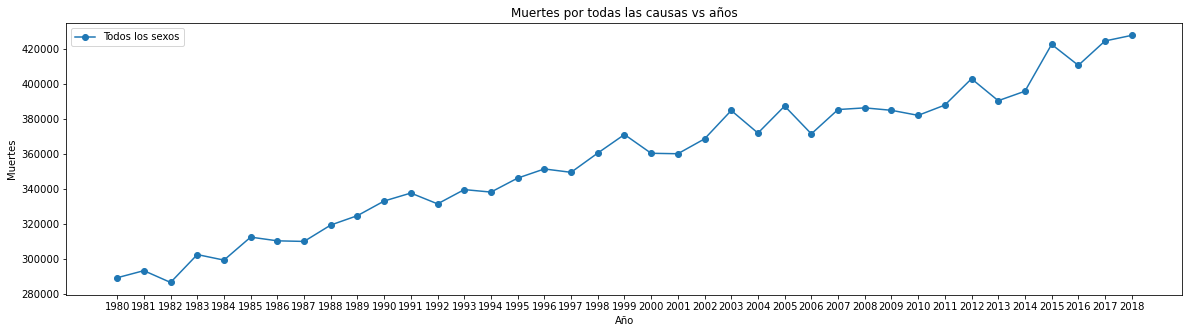

In [67]:
import matplotlib.pyplot as plt

# Ajustamos las dimensiones del gráfico.

f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(5) 

# Y graficamos con las columnas requeridas y un formato de puntos unidos por líneas.

plt.plot(datos_todos_sexos["Periodo"], datos_todos_sexos["Total"], 'o-', label="Todos los sexos")
plt.title("Muertes por todas las causas vs años")
plt.xticks(list(range(1980, 2019)))
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.legend(loc="upper left")
plt.show()

Como a continuación se nos requiere hacer una representación gráfica donde aparezca la misma curva con curvas segregadas por sexo anexadas en el mismo gráfico, vamos a generar dos DF secundarios según los sexos con procedimiento similares a los ya utilizados:

In [68]:
cond = datos["Sexo"] == "Hombres"

cond2 = datos["Edad"] == "Todas las edades"

# Imponemos condiciones de filtro y elaboramos el DF para Sexo = Hombres.

datos_hombres = datos[cond & cond2]

In [69]:
datos_hombres

,Causa de muerte,Sexo,Edad,Periodo,Total
858,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2018,216442
859,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2017,214236
860,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2016,208993
861,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2015,213309
862,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2014,201571
863,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2013,199834
864,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2012,205920
865,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2011,199854
866,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2010,198121
867,001-102 I-XXII.Todas las causas,Hombres,Todas las edades,2009,199095


In [70]:
cond = datos["Sexo"] == "Mujeres"

cond2 = datos["Edad"] == "Todas las edades"

# Imponemos condiciones de filtro y elaboramos el DF para Sexo = Mujeres.

datos_mujeres = datos[cond & cond2]

In [71]:
datos_mujeres

,Causa de muerte,Sexo,Edad,Periodo,Total
1716,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2018,211279
1717,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2017,210287
1718,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2016,201618
1719,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2015,209259
1720,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2014,194259
1721,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2013,190585
1722,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2012,197030
1723,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2011,188057
1724,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2010,183926
1725,001-102 I-XXII.Todas las causas,Mujeres,Todas las edades,2009,185838


Ahora podemos plotear todo junto en la misma gráfica, determinando el tamaño que queremos y añadiendo una leyenda y títulos globales y por ejes para clarificar la interpretación.

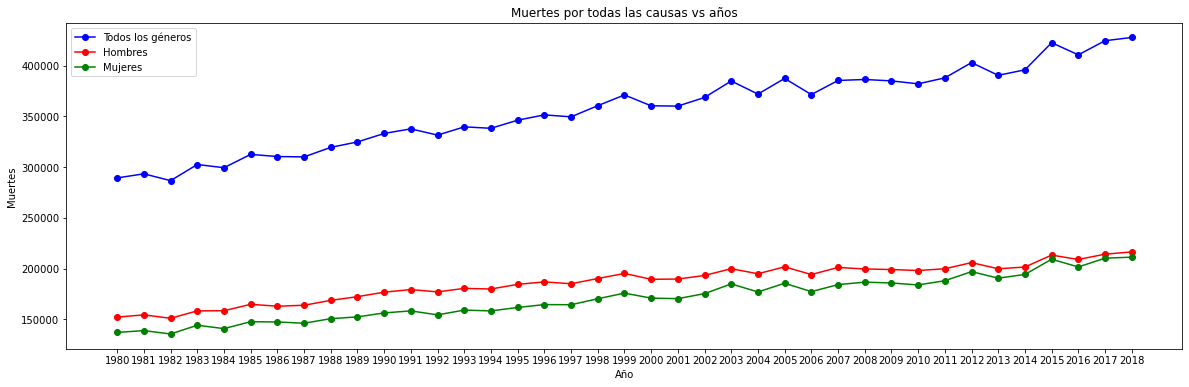

In [72]:
f = plt.figure() 
f.set_figwidth(20) 
f.set_figheight(6)

plt.plot(datos_todos_sexos["Periodo"], datos_todos_sexos["Total"], "bo-", label="Todos los géneros")
plt.plot(datos_todos_sexos["Periodo"], datos_hombres["Total"], "ro-", label="Hombres")
plt.plot(datos_todos_sexos["Periodo"], datos_mujeres["Total"], "go-", label="Mujeres")
plt.title("Muertes por todas las causas vs años")
plt.xticks(list(range(1980, 2019)))
plt.xlabel("Año")
plt.ylabel("Muertes")
plt.legend(loc="upper left")
plt.show()

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Seguimos utilizado expresiones regulares.
   - Se utilizan funciones de primer y segundo orden.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes, tanto para selección de columnas como para filtrado.
   - Librerías externas.
   - Elaboración de gráficos con tipado de ejes, títulos, formatos de línea y leyenda incluyendo varias series en el mismo gráfico.
   
### ¿Se consiguieron los objetivos?

 Sí. Se ha conseguido todo lo pedido y más. Hemos jugado con los formatos de las gráficas más de lo requerido en un principio, incluyendo series extra que no eran estrictamente necesarias pero que amplian el contenido informativo, jugando con los títulos de los ejes y los tamaños de los gráficos, imponiendo formatos determinados a las diferentes series que figuran en un mismo gráfico y reflejando estos formatos en una leyenda adecuadamente posicionada. Se sigue jugando con más opciones de selección y manejo de Pandas DataFrames. No veo ningún fallo en el apartado ni ningún objetivo que no haya sido cubierto, aunque como siempre digo, seguro que el código es optimizable a ojos de un programador con más experiencia.
 
### Ayuda externa:

 La normal, documentación del curso así como búsqueda por internet de contenido extra sobre graficado de funciones con el paquete pyplot que no viniera reflejado en el material proporcionado.

## f) Población española y cálculo del índice de mortalidad.
  A continuación se va a elaborar un DataFrame que combine los datos de la tabla de mortalidad por causas que se nos dió para utilizar originalmente y otra con la población española distribuida por sexo, edades y años.
  
  El objetivo final es añadir una columna con la tasa de mortalidad para cada sexo, rango de edad y año.

Los datos de la tabla que utilizaremos para extraer los datos de población han sido extraídos del INE y el csv original figura en el fichero entregado. Como el tamaño de descarga máximo está limitado el formato de los datos descargados para cumplir las condiciones de menos de 10000 filas fue:

   - El sexo se limitó a Hombre y Mujeres, prescindiendo del total ya que mediantes operaciones de agrupación lo podemos calcular nosotros mismos en Pandas y es uno de los puntos que cubriremos.
    
   - La Edad no venía agrupada por rangos de edades ya que los ficheros con este formato solo nos permitían remontarnos hasta 2012 y el rango de años que nos gustaría cubrir es de 1980 hasta 2012.
    
   - La columna de Provincias es completamente prescindible y no la utilizaremos.
    
   - La columna de Periodo referente al año tendrá que ser reformateada correctamente ya que más adelante hacemos un join con la tabla de mortalidad y nos interesa que tengan el mismo formato. Hemos descargado únicamente los registros de población tomados el 1 de Enero de cada año para así reducir a la mitad el tamaño de la descarga.
    
   - En esta misma columna, Periodo, nos vemos obligados a eliminar los registros del año 1980 ya que los datos de población del colectivo de Mujeres presentan una gran cantidad de datos faltantes, por lo que el estudio final se hará en el periodo de 1981-2018.
    
   - La columna Total es sometida a un reformateo para prescindir de los signos de puntuación de millares que pueden inducir interpretaciones como decimales. Lo hacemos de manera muy similar a como lo hicimos con los demás sets de datos utilizados durante la práctica.

El proceso de elaboración del DataFrame final no es trivial como pueda parecer dado que hay que formatear numerosos campos y someter a las tablas a transformaciones para conseguir los datos que no pudimos obtener por las condiciones de la descarga del fichero, por lo que todos los pasos se irán detallando debidamente tal y como se vayan produciendo.

-----------------------------------------

El primer paso importante es echar un vistazo a la estructura de los datos que tenemos originalmente:

In [73]:
datos = pd.read_csv("Poblacion2.csv", delimiter = ";",encoding = 'iso-8859-1')
datos

,Sexo,Edad,Provincias,Periodo,Total
0,Hombres,Total,Total Nacional,1 de enero de 2020,23.199.313
1,Hombres,Total,Total Nacional,1 de enero de 2019,23.009.259
2,Hombres,Total,Total Nacional,1 de enero de 2018,22.881.882
3,Hombres,Total,Total Nacional,1 de enero de 2017,22.834.227
4,Hombres,Total,Total Nacional,1 de enero de 2016,22.807.464
...,...,...,...,...,...
8359,Mujeres,100 y más años,Total Nacional,1 de enero de 1984,2.665
8360,Mujeres,100 y más años,Total Nacional,1 de enero de 1983,2.516
8361,Mujeres,100 y más años,Total Nacional,1 de enero de 1982,2.427
8362,Mujeres,100 y más años,Total Nacional,1 de enero de 1981,2.153


Podemos ver el formato original de los datos, y habrá que cambiar elaborando una importación más detallada mucho de los aspectos de esta tabla para que se ajuste lo máximo posible al modelo de la tabla de mortalidad ya que más adelante haremos un join utilizando hasta tres columnas como parámetros del join y deben tener tipos y dominios similares para que todo funcione correctamente. Sobre todo el ajustar los dominios para que dos variables con la misma información, tipo y nombre contengan exactamente lo mismo y expresen los campos similares de la misma manera ha sido la tarea más delicada de esta parte del proyecto.

Es importante observar también que el formato ha tenido que ser declarado al Pandas csv reader para la correcta importación al contener el documento original el caracter "ñ".

### Elaboración previa de funciones:

A continuación vamos a elaborar y explicar dos funciones que tendremos que utilizar al hacer la importación correcta de los datos.

In [74]:
def reformat(string):
    
    """
    Función que reformatea los datos en la columna Edad de la tabla de datos importada para que tenga un formato más sencillo
    para posteriormente catalogar las edades por grupos de edades.
    
        
    Parameters
    ----------
    string : string
        String que indica la edad.
    
    Returns
    -------
    Devuelve un string de manera condicionada que indica la edad.
    
    
    Example
    -------
    >>> reformat("100 y más años")
    "> 100"
    >>> reformat("17 años")
    "17"
    >>> es_grupo_y_no_total("Total")
    "Todas las edades"
    """
    
    # La función se construye con condicionales y utilizando el comando findall de expresiones regulares para separar el
    # entero (\d) de un string en algunos de los casos.
    
    if string == "100 y más años":
        return("> 100")               
            
    else:
            
        if string != "Total":
                
            busqueda = re.findall("\d+", string)
            return(busqueda[0])
                                   
        else:
                                   
            return("Todas las edades")

In [75]:
for i in ["100 y más años", "17 años", "43 años", "94 años", "Total"]:
    print(i, "----->",reformat(i))

100 y más años -----> > 100
17 años -----> 17
43 años -----> 43
94 años -----> 94
Total -----> Todas las edades


La siguiente función asigna a cada edad individual el rango de edades en grupos de 5 años correspondiente para adaptarla así al formato del DataFrame con datos de mortalidad. Posteriormente será aplicada a una lista extraida de la columna Edad del DataFrame de población para elaborar una nueva columna con la información de los grupos.

In [76]:
def rangos_edades(string):
        
    """
    Función que reformatea los datos en la columna Edad para asignarles un grupo de edades.
    
        
    Parameters
    ----------
    string : string
        String que indica la edad y que en algunos de los casos es reformateada a entero para evaluarlo en las sentencias
        condicionales.
    
    Returns
    -------
    Devuelve un string de manera condicionada que indica el rango de edad.
    
    
    Example
    -------
    >>> rangos_edades("2")
    "De 1 a 4 años"
    >>> rangos_edades("Todas las edades")
    "Todas las edades"
    >>> rangos_edades("96")
    "95 y más años"
    """
    
    # La lógica tras esta función es muy sencilla, son asignaciones basadas a que el valor de la entrada sea exactamente
    # un string concreto y en caso de que no, que su casteo como string se encuentre en un rango de valores.
    
    if string == "Todas las edades":
        return("Todas las edades")
    elif string == "> 100":
        return("95 y más años")
    elif int(string) == 0:
        return("Menos de 1 año")
    elif int(string) in (1,2,3,4):
        return("De 1 a 4 años")
    elif int(string) in (5,6,7,8,9):
        return("De 5 a 9 años")
    elif int(string) in (10,11,12,13,14):
        return("De 10 a 14 años")
    elif int(string) in (15,16,17,18,19):
        return("De 15 a 19 años")
    elif int(string) in (20,21,22,23,24):
        return("De 20 a 24 años")
    elif int(string) in (25,26,27,28,29):
        return("De 25 a 29 años")
    elif int(string) in (30,31,32,33,34):
        return("De 30 a 34 años")
    elif int(string) in (35,36,37,38,39):
        return("De 35 a 39 años")
    elif int(string) in (40,41,42,43,44):
        return("De 40 a 44 años")
    elif int(string) in (45,46,47,48,49):
        return("De 45 a 49 años")
    elif int(string) in (50,51,52,53,54):
        return("De 50 a 54 años")
    elif int(string) in (55,56,57,58,59):
        return("De 55 a 59 años")
    elif int(string) in (60,61,62,63,64):
        return("De 60 a 64 años")
    elif int(string) in (65,66,67,68,69):
        return("De 65 a 69 años")
    elif int(string) in (70,71,72,73,74):
        return("De 70 a 74 años")
    elif int(string) in (75,76,77,78,79):
        return("De 75 a 79 años")
    elif int(string) in (80,81,82,83,84):
        return("De 80 a 84 años")
    elif int(string) in (85,86,87,88,89):
        return("De 85 a 89 años")
    elif int(string) in (90,91,92,93,94):
        return("De 90 a 94 años")
    else:
        return("95 y más años")

Podemos probar esta función junto a la anterior de manera encadenada para ver cómo funcionaría para cada uno de los posibles valores de la variable Edad del DataFrame original.

In [77]:
edades = datos.drop_duplicates(["Edad"])[["Edad"]]
lista = edades["Edad"].to_list()
for i in lista:
    print(i, "--->", reformat(i), "--->", rangos_edades(reformat(i)))

Total ---> Todas las edades ---> Todas las edades
0 años ---> 0 ---> Menos de 1 año
1 año ---> 1 ---> De 1 a 4 años
2 años ---> 2 ---> De 1 a 4 años
3 años ---> 3 ---> De 1 a 4 años
4 años ---> 4 ---> De 1 a 4 años
5 años ---> 5 ---> De 5 a 9 años
6 años ---> 6 ---> De 5 a 9 años
7 años ---> 7 ---> De 5 a 9 años
8 años ---> 8 ---> De 5 a 9 años
9 años ---> 9 ---> De 5 a 9 años
10 años ---> 10 ---> De 10 a 14 años
11 años ---> 11 ---> De 10 a 14 años
12 años ---> 12 ---> De 10 a 14 años
13 años ---> 13 ---> De 10 a 14 años
14 años ---> 14 ---> De 10 a 14 años
15 años ---> 15 ---> De 15 a 19 años
16 años ---> 16 ---> De 15 a 19 años
17 años ---> 17 ---> De 15 a 19 años
18 años ---> 18 ---> De 15 a 19 años
19 años ---> 19 ---> De 15 a 19 años
20 años ---> 20 ---> De 20 a 24 años
21 años ---> 21 ---> De 20 a 24 años
22 años ---> 22 ---> De 20 a 24 años
23 años ---> 23 ---> De 20 a 24 años
24 años ---> 24 ---> De 20 a 24 años
25 años ---> 25 ---> De 25 a 29 años
26 años ---> 26 ---> De 25 a

Ahora vamos a elaborar una función de importación del DataFrame de población un poco más trabajada en la que mejoramos el formato dado a la columna Total para corregir posibles errores de puntuación y formateamos la columna Periodo para que tan solo aparezcan los años y no el resto de la fecha. A su vez también asignaremos los tipos deseados a cada campo.

In [78]:
def cargar_datos(nombre_csv):
    
    """
    Función que importa el csv de datos de población, corrigiendo los problemas por las puntuaciones en el campo "Total".
    A su vez, elabora un nuevo campo "Periodo_int" con el año de la fecha correspondiente como entero, y crea dos columnas
    adicionales haciendo uso de las funciones definidas previamente. La primera "Edad_re" transforma la edad a un formato
    más cómodo de manejar para transformarla luego e introducirla en el campo "Rango_Edades" que contiene los grupos de
    edad correspondientes.
        
    Parameters
    ----------
    nombre_csv : str
        Nombre del csv a importar, que figura en la misma carpeta que el notebook de esta función.
    
    Returns
    -------
    pandas.core.frame.DataFrame (Colección de filas de Pandas DataFrame.)
        Un dataframe de Pandas que cumple las condiciones especificadas.
    
    """
        
    # Leemos el csv, indicando separadores, la codificación correcta para que importe bien caracteres "ñ" y recasteamos
    # el tipo de la columna Total como string para que no haga interpretaciones de puntuación extrañas. Al final de la
    # función la casteamos de nuevo como entero tras eliminar las puntuaciones.
    
    DF_sucio = pd.read_csv(nombre_csv, delimiter = ";",encoding = 'iso-8859-1',dtype = {"Total": str})
    
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF_sucio["Total"] = DF_sucio["Total"].replace(regex=["\."],value="")
    
    # Creamos dos listas para operar sobre ellas con los siguientes bucles, la primera contiene los datos de la columna
    # "Periodo" y la segunda los de la columna "Edad".
    
    periodos_lista = DF_sucio["Periodo"].to_list()
    años_lista = DF_sucio["Edad"].to_list()
    
    #-------------------------------------------------#
    
    # Creamos la nueva columna "Periodos_int" que contiene solo el año del periodo, utilizamos un bucle para correr
    # sobre la lista y expresiones regulares.
    
    periodos_nuevos = []
    
    for i in range(len(DF_sucio)):
        busqueda = re.findall("\d+", periodos_lista[i])
        periodos_nuevos.append(busqueda[1])
        
    DF_sucio["Periodo_int"] = periodos_nuevos
    
    #-------------------------------------------------#
    
    # Creamos la columna "Edad_re" corriendo con nuestra función reformat definida previamente sobre la lista que contiene
    # la información sobre la columna "Edad" del DataFrame original.
    
    años_nuevos = []
    
    for i in range(len(DF_sucio)):
        
        años_nuevos.append(reformat(años_lista[i]))
        
                                   
    DF_sucio["Edad_re"] = años_nuevos
                                   
    #-------------------------------------------------#
    
    # Aplicamos la función rangos_edades definida previamente sobre la lista que contiene los valores de la columna "Edad_re"
    
    Edad_rango = []
    
    for i in range(len(DF_sucio)):
        Edad_rango.append(rangos_edades(años_nuevos[i]))
        
    DF_sucio["Rango_Edades"] = Edad_rango
        
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
#   DF_sucio_post = DF_sucio[DF_sucio["Periodo_int"] not in ["1980", "2020", "2019"]]

    # Eliminamos el año 1980 de los datos ya que presenta muchos valores nulos en los datos de población femenina y por lo
    # tanto no vamos a poder utilizarla aparte de que no nos permite castearla posteriormente como entero.
    
    DF_sucio_post = DF_sucio[DF_sucio["Periodo_int"] != "1980"]
    
    # Casteamos las columnas a sus tipos correspondientes.
                                   
    
    DF_limpio = DF_sucio_post.astype({"Provincias":"string",
                                      "Sexo":"string",
                                      "Edad":"string",
                                      "Periodo":"string",
                                      "Periodo_int":"int32",
                                      "Edad_re":"string",
                                      "Rango_Edades":"string",
                                      "Total": "int64"})

        
    
    
    return(DF_limpio)

Utilizamos la función previa para importar la tabla.

In [79]:
datos = cargar_datos("Poblacion2.csv")
datos

,Sexo,Edad,Provincias,Periodo,Total,Periodo_int,Edad_re,Rango_Edades
0,Hombres,Total,Total Nacional,1 de enero de 2020,23199313,2020,Todas las edades,Todas las edades
1,Hombres,Total,Total Nacional,1 de enero de 2019,23009259,2019,Todas las edades,Todas las edades
2,Hombres,Total,Total Nacional,1 de enero de 2018,22881882,2018,Todas las edades,Todas las edades
3,Hombres,Total,Total Nacional,1 de enero de 2017,22834227,2017,Todas las edades,Todas las edades
4,Hombres,Total,Total Nacional,1 de enero de 2016,22807464,2016,Todas las edades,Todas las edades
...,...,...,...,...,...,...,...,...
8358,Mujeres,100 y más años,Total Nacional,1 de enero de 1985,2627,1985,> 100,95 y más años
8359,Mujeres,100 y más años,Total Nacional,1 de enero de 1984,2665,1984,> 100,95 y más años
8360,Mujeres,100 y más años,Total Nacional,1 de enero de 1983,2516,1983,> 100,95 y más años
8361,Mujeres,100 y más años,Total Nacional,1 de enero de 1982,2427,1982,> 100,95 y más años


Y consultamos tipos que nunca está de más.

In [80]:
datos.dtypes

Sexo            string
Edad            string
Provincias      string
Periodo         string
Total            int64
Periodo_int      int32
Edad_re         string
Rango_Edades    string
dtype: object

A continuación cargamos el archivo con los datos de mortalidad (tabla completa). La importación es similar a la realizada en otros muchos apartados y se va a explicar ligeramente.

In [81]:
def cargar_datos_mort(nombre):
    
    """
    Función que importa un archivo csv y muestra por pantalla el rango de filas pedidas.
    
    Parameters
    ----------
    nombre : str
        Nombre del archivo csv a importar.

        
    Return
    ------
    pandas.core.frame.DataFrame (Colección de filas de Pandas DataFrame.)
        Un dataframe de Pandas que cumple las condiciones especificadas.
    
    
    """

    # En este caso, la importación de la columna Periodo se hace como entero automaticamente, pero debido a los
    # delimitadores decimales del csv original, en la columna total nos hace conversiones donde interpreta que
    # la coma, en lugar de separar millares es un punto que separa decimales. Mi manera de solucionarlo es la siguiente.
    
    # Importamos el csv declarando la columna Total como str para que no haga cambios extraños por su cuenta.
    
    DF = pd.read_csv(nombre, delimiter = ";",dtype = {"Total": str})
    
    # Ahora estamos en la situación del apartado anterior y podemos tomar medidas equivalentes.
    # Podemos actuar sobre todos los valores de determinadas columnas.
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF["Total"] = DF["Total"].replace(regex=["\."],value="")
    
    # Prescindimos del año 1980 por los problemas citados anteriormente.
    
    DF_limpio = DF[DF["Periodo"] != 1980]
    
    # Existía un problemilla con los rangos de edades del csv de mortalidad, algunos de ellos presentaban espacios
    # finales que a la hora de hacer el join que tenemos planeado pueden interferir en él, así que los podemos.
    
    lista_edades = DF_limpio["Edad"].to_list()
    lista_edades_re = []
    
    for i in lista_edades:
        lista_edades_re.append(i.rstrip())
        
    DF_limpio["Edad"] = lista_edades_re
    
    # Hasta ahora estos espacios no habían tenido ningún tipo de presencia en nuestras operaciones y ni siquiera se habían
    # dado a notar. Ahora con el join que intentabamos hacer dieron problemas y se tuvo que optar por podarlos.
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
    DF_limpio = DF_limpio.astype({"Causa de muerte":"string", "Sexo":"string", "Edad":"string", "Periodo":"int32","Total": "int64"})
    
        
    return(DF_limpio)

Realizamos la importación y comprobamos que el el DataFrame que ya hemos utilizado extensivamente durante la práctica.

In [82]:
datos_mort = cargar_datos_mort("ine_mortalidad_espanna.csv")
datos_mort

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
...,...,...,...,...,...
301152,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1985,0
301153,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0
301154,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0
301155,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0


A continuación, con los dos DataFrames correctamente importados comienza la segunda fase, elaborar el DataFrame final. El objetivo final es realizar un join entre los dos utilizando como argumentos las columnas Sexo, Periodo y Edad que se han formateado correctamente para ello. Pero nos quedan algunos asuntos que resolver como:

 - Tenemos que conseguir filas para las estadísticas de población total para los dos sexos sumados en cada uno de los periodos y rangos de edades del DataFrame de población.
 - Aunque hemos creado la columna con los rangos de edades tenemos que agruparlos y sumar las filas que cumplan las condiciones de estar en el mismo rango de edad con el mismo sexo y en el mismo periodo.
 
Vamos a resolver estos dos asuntos.

Comenzamos con el asunto de juntar las filas con los mismos rangos de edades, sexos y periodo. Lo hacemos agrupando según estas variables y sumando el valor de la columna Total para cada uno de estos grupos. El planteamiento es sencillo y gracias a la manipulación que nos permite Pandas la solución práctica también lo es:

In [83]:
datos_pobl_agrupados = datos.groupby(["Rango_Edades", "Sexo", "Periodo_int"]).agg({"Total": ["sum"]}).reset_index()

In [84]:
# Renombramos las columnas.

datos_pobl_agrupados.columns = ["Rango_Edades", "Sexo", "Periodo_int", "Total"]

In [85]:
# Mostramos.

datos_pobl_agrupados

,Rango_Edades,Sexo,Periodo_int,Total
0,95 y más años,Hombres,1981,3658
1,95 y más años,Hombres,1982,3716
2,95 y más años,Hombres,1983,3905
3,95 y más años,Hombres,1984,4126
4,95 y más años,Hombres,1985,4650
...,...,...,...,...
1755,Todas las edades,Mujeres,2016,23632635
1756,Todas las edades,Mujeres,2017,23692812
1757,Todas las edades,Mujeres,2018,23776565
1758,Todas las edades,Mujeres,2019,23927801


Ahora tenemos pendiente conseguir todas las filas correspondientes a la población Total de los dos sexos agregados para cada periodo y cada rango de edades. A partir del DF anterior vamos a agrupar por "Rango_Edades" y "Periodo_int" y sumar los valores, esto nos compone un nuevo DataFrame con 3 columnas, "Rango_Edades", "Periodo_int", que son los parámetros de agrupación y otra correspondiente a la suma del "Total" para cada una de estas agrupaciones. Si hemos manejado antes bases de datos relacionales a través de lenguajes tipo SQL este proceso nos resultará familiar.

In [86]:
datos_sexos_agregados = datos_pobl_agrupados.groupby(["Rango_Edades", "Periodo_int"]).agg({"Total": ["sum"]}).reset_index()

# Renombramos las columnas y volvemos a mostrar:

datos_sexos_agregados.columns = ["Rango_Edades", "Periodo_int", "Total"]
datos_sexos_agregados

,Rango_Edades,Periodo_int,Total
0,95 y más años,1981,14289
1,95 y más años,1982,14877
2,95 y más años,1983,15319
3,95 y más años,1984,15889
4,95 y más años,1985,17169
...,...,...,...
875,Todas las edades,2016,46440099
876,Todas las edades,2017,46527039
877,Todas las edades,2018,46658447
878,Todas las edades,2019,46937060


Si consultamos la tabla anterior con los datos distribuidos por sexo Hombre o Mujer, podemos ver que en esta nueva tabla falta la columna sexo. El proceso de conseguir la tabla final implica la unión (pegar verticalmente los dos DataFrames), por lo que debemos conseguir que ambos presenten las mismas columnas con los mismos tipos, de no ser así la unión no será posible. Es sencillo realizarlo, vamos a ello.

In [87]:
# Creamos una lista con el valor "Total" repetido tantas veces como la longitud del DataFrame al que añadiremos la lista
# como columna.

relleno = ["Total"] * len(datos_sexos_agregados)

# Añadimos la lista como columna llamada "Sexo".

datos_sexos_agregados["Sexo"] = relleno

# Reordenamos las columnas para que tengan el mismo orden que el del DataFrame con el que queremos hacer la unión.

datos_sexos_agregados = datos_sexos_agregados.reindex(columns= ['Rango_Edades', 'Sexo', 'Periodo_int','Total'])

# Mostramos.

datos_sexos_agregados

,Rango_Edades,Sexo,Periodo_int,Total
0,95 y más años,Total,1981,14289
1,95 y más años,Total,1982,14877
2,95 y más años,Total,1983,15319
3,95 y más años,Total,1984,15889
4,95 y más años,Total,1985,17169
...,...,...,...,...
875,Todas las edades,Total,2016,46440099
876,Todas las edades,Total,2017,46527039
877,Todas las edades,Total,2018,46658447
878,Todas las edades,Total,2019,46937060


El DataFrame con el que lo queremos unir es el anterior y lo podemos consultar para que veamos que la estructura de columnas es similar:

In [88]:
datos_pobl_agrupados

,Rango_Edades,Sexo,Periodo_int,Total
0,95 y más años,Hombres,1981,3658
1,95 y más años,Hombres,1982,3716
2,95 y más años,Hombres,1983,3905
3,95 y más años,Hombres,1984,4126
4,95 y más años,Hombres,1985,4650
...,...,...,...,...
1755,Todas las edades,Mujeres,2016,23632635
1756,Todas las edades,Mujeres,2017,23692812
1757,Todas las edades,Mujeres,2018,23776565
1758,Todas las edades,Mujeres,2019,23927801


Hacemos la unión de los dos:

In [89]:
DF_pobl_definitivo = pd.concat([datos_pobl_agrupados, datos_sexos_agregados])

Una manera de asegurar que todo ha salido bien es consultar el número de filas de los DataFrames. Esperamos que la tabla donde agregamos los totales de los dos sexos tenga la mitad de columnas que su tabla madre y a su vez que la tabla final que hemos conseguido haciendo la unión de estas dos tenga un número de filas igual a la suma de las filas de las dos tablas unidas. Podemos ver que es así.

In [90]:
print(len(datos_pobl_agrupados))
print(len(datos_sexos_agregados))
print(len(DF_pobl_definitivo))

1760
880
2640


Estamos llegando al final del largo proceso y ahora estamos en condiciones de hacer el glorioso JOIN para el que tanto hemos preparado el terreno. La sintaxis del comando merge que es el que usaremos es muy sencilla, primero declaramos las dos tablas que queremos unir, que son nuestros primeros dos argumentos. Tras ello el tipo del join, en mi caso un left join, ya que quiero que todas las filas del dataframe de mortalidad, que considero el principal, figuren. En este caso un inner join hubiera dado los mismos resultados. Obervar que la tabla de poblaciones incluía registros para los años 2020 y 2019, pero como el DF a la izquierda, el de mortalidad, no los inlcluye no figurarán en el DataFrame producto del left join.
Tras declarar el tipo solo nos queda especificar las columnas sobre las que se hará el JOIN, en mi caso son las que figuran en los argumentos left_on y right_on. Si estamos relacionados con lenguajes tipo SQL y manejo de bases de datos este proceso nos resultará trivial.

Como tuvimos el problema previo con los espacios introducidos en las denominaciones de los rangos de edades no está de más hacer una último comprobación para ver que todos los rangos tienen la misma denominación y no van a ocurrir cosas raras al hacer el join.

In [91]:
asd = DF_pobl_definitivo.drop_duplicates(["Rango_Edades"])[["Rango_Edades"]]
print(asd["Rango_Edades"].to_list())

['95 y más años', 'De 1 a 4 años', 'De 10 a 14 años', 'De 15 a 19 años', 'De 20 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 5 a 9 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'De 75 a 79 años', 'De 80 a 84 años', 'De 85 a 89 años', 'De 90 a 94 años', 'Menos de 1 año', 'Todas las edades']


In [92]:
edades = datos_mort.drop_duplicates(["Edad"])[["Edad"]]
print(edades["Edad"].to_list())

['Todas las edades', 'Menos de 1 año', 'De 1 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 15 a 19 años', 'De 20 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'De 75 a 79 años', 'De 80 a 84 años', 'De 85 a 89 años', 'De 90 a 94 años', '95 y más años']


In [93]:
total_DF = pd.merge(datos_mort, DF_pobl_definitivo,
                    how='left',
                    left_on=["Sexo", "Edad", "Periodo"],
                    right_on=["Sexo", "Rango_Edades", "Periodo_int"])
total_DF

,Causa de muerte,Sexo,Edad,Periodo,Total_x,Rango_Edades,Periodo_int,Total_y
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,Todas las edades,2018,46658447
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,Todas las edades,2017,46527039
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,Todas las edades,2016,46440099
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,Todas las edades,2015,46449565
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,Todas las edades,2014,46512199
...,...,...,...,...,...,...,...,...
293431,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1985,0,95 y más años,1985,12519
293432,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0,95 y más años,1984,11763
293433,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0,95 y más años,1983,11414
293434,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0,95 y más años,1982,11161


Hacemos unos últimos ajustes, añadimos la deseada columna de Tasa de Mortalidad, calculada para cada fila como el cociente entre el número de fallecidos entre la población. Incluyo también esta tasa dada como un tanto por ciento. Además eliminamos las columnas redundantes y reordenamos las restantes.

In [94]:
total_DF["Tasa de mortalidad"] = total_DF["Total_x"] / total_DF["Total_y"]
total_DF["Tasa de mortalidad %"] = (total_DF["Total_x"] / total_DF["Total_y"]) *100
total_DF = total_DF.drop("Rango_Edades", axis = 1).drop("Periodo_int", axis = 1)
total_DF.columns = ["Causa de muerte", "Sexo", "Edad", "Periodo", "Total fallecidos", "Población", "Tasa de mortalidad", "Tasa de mortalidad %"]
total_DF

,Causa de muerte,Sexo,Edad,Periodo,Total fallecidos,Población,Tasa de mortalidad,Tasa de mortalidad %
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,46658447,0.009167,0.916706
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,46527039,0.009124,0.912422
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,46440099,0.008842,0.884173
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,46449565,0.009097,0.909735
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830,46512199,0.008510,0.851024
...,...,...,...,...,...,...,...,...
293431,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1985,0,12519,0.000000,0.000000
293432,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0,11763,0.000000,0.000000
293433,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0,11414,0.000000,0.000000
293434,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0,11161,0.000000,0.000000


Podemos comprobar que el número de filas es el mismo que el del DataFrame original, por lo tanto incluye la misma información que este con las columnas añadidas de población y tasa de mortalidad.

In [95]:
len(total_DF)

293436

In [96]:
len(datos_mort)

293436

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Seguimos utilizado y profundizando en las expresiones regulares.
   - Se utilizan funciones de primer y segundo orden.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   - Librerías externas.
   - Se profundiza en el manejo de los DataFrame incluyendo funciones como los JOIN (Merge) o las uniones y utilizando funciones de agrupación más propias de lenguajes SQL.
   
### ¿Se consiguieron los objetivos?

 Me parece que este apartado es sencillamente excelente. No era en absoluto sencillo plantear qué sets de datos debíamos descargar para conseguir reflejar toda la información que quería incluir debido a la limitación de filas que nos imponía la página web del INE. Hay que tener en cuenta que estoy incluyendo series de información que ni siquiera se pedían, como aquella referida al total de sexos. Hemos tenido que cubrir muchos huecos en nuestros datos como computar el total de todos los sexos con funciones de agregación debidamente planteadas, utilizar uniones de distintos dataframes debidamente formateados anteriormente. Computar las edades que originalmente aparecían desagregadas en grupos de 5 años ha sido otro gran bache a solucionar que al final se ha solventado con las debidas funciones de agrupación y la utilización de merge (JOINS) entre los DataFrames adecuados. Me parece que el procedimiento ha sido muy bueno, quizás puede haber soluciones mejores pero esta funciona y conceptualmente es sencilla. Todo ha sido debidamente explicado detalle por detalle y aun a pesar de la relativa complejidad con respecto a otros apartados creo que el resultado ha quedado muy comprensible a ojos externos cosa que no siempre es fácil.
 
### Ayuda externa:

 Teniendo en cuenta que nunca había utilizado comandos tipos JOIN, unión o de agrupación en Pandas y que es material que no viene reflejado en el curso he tenido que buscar documentación en internet.

## g) Gráfico de "Tasas de mortalidad" vs "Edad" para los dos sexos.

  Vamos a elaborar la gráfica citada. Se elaborará la función que muestre estos gráficos pidiendo como argumentos de entrada la causa que se quiere consultar así como el año.

Podemos elegir la causa de entre toda la lista que se da a continuación para el usuario.

In [97]:
causas = total_DF.drop_duplicates(["Causa de muerte"])[["Causa de muerte"]]
for i in (causas["Causa de muerte"].to_list()):
    print(i)

001-102  I-XXII.Todas las causas
001-008  I.Enfermedades infecciosas y parasitarias
001  Enfermedades infecciosas intestinales
002  Tuberculosis y sus efectos tardíos
003  Enfermedad meningocócica
004  Septicemia
005  Hepatitis vírica
006  SIDA
007  VIH+ (portador, evidencias de laboratorio del VIH, ...)
008  Resto de enfermedades infecciosas y parasitarias y sus efectos tardíos
009-041  II.Tumores
009  Tumor maligno del labio, de la cavidad bucal y de la faringe
010  Tumor maligno del esófago
011  Tumor maligno del estómago
012  Tumor maligno del colon
013  Tumor maligno del recto, de la porción rectosigmoide y del ano
014  Tumor maligno del hígado y vías biliares intrahepáticas
015  Tumor maligno del páncreas
016  Otros tumores malignos digestivos
017  Tumor maligno de la laringe
018  Tumor maligno de la tráquea, de los bronquios y del pulmón
019  Otros tumores malignos respiratorios e intratorácicos
020  Tumores malignos del hueso y de los cartílagos articulares
021  Melanoma malign

In [98]:
def grafico(causa, año):
    
    """
    Función que devuelve un gráfico con los rangos de edad por abscisa, la tasa de mortalidad como ordenada  y para una
    determinada causa y año.
    
        
    Parameters
    ----------
    causa : string
        String que indica la causa de fallecimiento.
    año : int
        Entero para indicar el año a estudiar.
    
    Returns
    -------
    Devuelve un gráfico con abscisas los rangos de edad, ordenadas como la tasa de mortalidad para una
    determinada causa y año.
    

    """
    
    # Imponemos ciertas condiciones, el procedimiento va a utilizar 3 DataFrames, uno para cada serie, Mujeres, Hombres y
    # Total. Ya que deforman los datos en cierta manera impedimos que entren registros para los rangos de edad "Menos de
    # 1 año" y "Todas las edades". Seleccionamos estos DF para que contengan solo información de la causa de muerte
    # especificada y el año introducido.
    
    cond1 = total_DF["Sexo"] == "Hombres"
    cond2 = total_DF["Sexo"] == "Mujeres"
    cond3 = total_DF["Sexo"] == "Total"
    cond_causa = total_DF["Causa de muerte"] == causa
    cond_año = total_DF["Periodo"] == año
    lista_prohibida = ["Todas las edades", "Menos de 1 año"]
    cond_edad = ~total_DF["Edad"].isin(lista_prohibida)

    
    Hombres_DF = total_DF[cond1 & cond_causa & cond_año & cond_edad]
    Mujeres_DF = total_DF[cond2 & cond_causa & cond_año & cond_edad]
    Todos_DF = total_DF[cond3 & cond_causa & cond_año & cond_edad ]
    
    # Vamos a recodificar el campo de edades para que aparezcan como número y sea un poco más estético. Lo hacemos a través
    # de listas que pasaremos por bucles que recodifican los campos como queramos.
    
    lista_edades = Hombres_DF["Edad"].to_list()
    
    edad_lista_re = []
    
    for i in range(len(lista_edades)):
        
        # Hacemos uso de las expresiones regulares para identificar las cadenas que contengan números enteros.
        # Por lo demás la función no tiene nada más remarcable, se hacen uso de bucles, condicionales y estructura de listas.
    
        busqueda = re.findall("\d+", lista_edades[i])
    
        if len(busqueda)>=1:
            edad_lista_re.append(int(busqueda[0]))
        
        elif edad_lista[i] == "Todas las edades":
            edad_lista_re.append("Todas")
        
        elif edad_lista[i] == "Menos de 1 año":
            edad_lista_re.append(0)
        
        else:
            edad_lista_re.append(95)
            
    # Entramos las listas como la nueva variables "Edad" de nuestros DF.
            
    Hombres_DF["Edad_re"] = edad_lista_re
    Mujeres_DF["Edad_re"] = edad_lista_re
    Todos_DF["Edad_re"] = edad_lista_re
    
    # Especificamos las instrucciones para nuestro plot. Son similares a la introducidas en el apartado anterior
    # por lo que no se profundizará en ellas.
       
    
    f = plt.figure() 
    f.set_figwidth(20) 
    f.set_figheight(5)

    plt.plot(Todos_DF["Edad_re"], Todos_DF["Tasa de mortalidad"], "bo-", label="Todos los géneros")
    plt.plot(Hombres_DF["Edad_re"], Hombres_DF["Tasa de mortalidad"], "ro-", label="Hombres")
    plt.plot(Mujeres_DF["Edad_re"], Mujeres_DF["Tasa de mortalidad"], "go-", label="Mujeres")
    plt.title("Tasa de mortalidad por " + causa +  " vs Rango de Edad en el año " + str(año))
    plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
    plt.xlabel("Rango de Edad")
    plt.ylabel("Tasa de mortalidad")
    plt.legend(loc="upper left")
    plt.show()
    

Ahora podemos probar un poquito nuestra función.

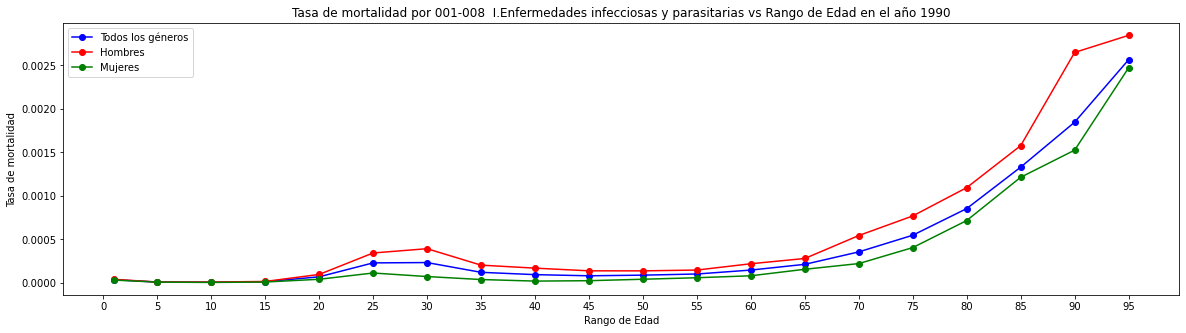

In [99]:
grafico('001-008  I.Enfermedades infecciosas y parasitarias', 1990)

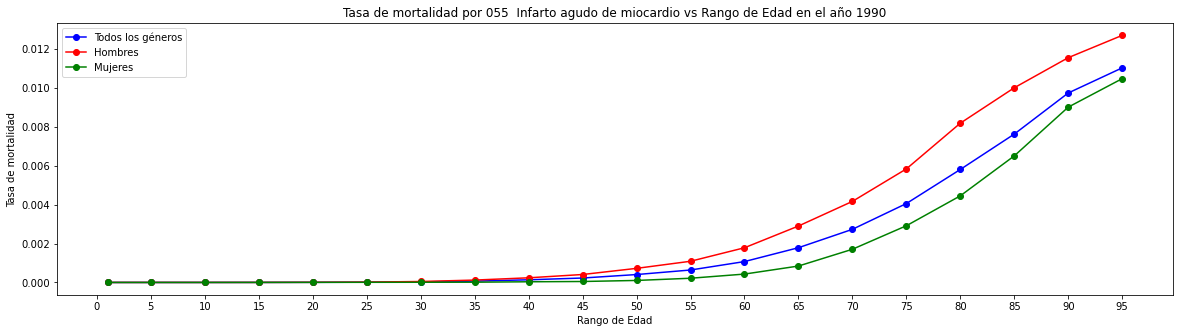

In [100]:
grafico('055  Infarto agudo de miocardio', 1990)

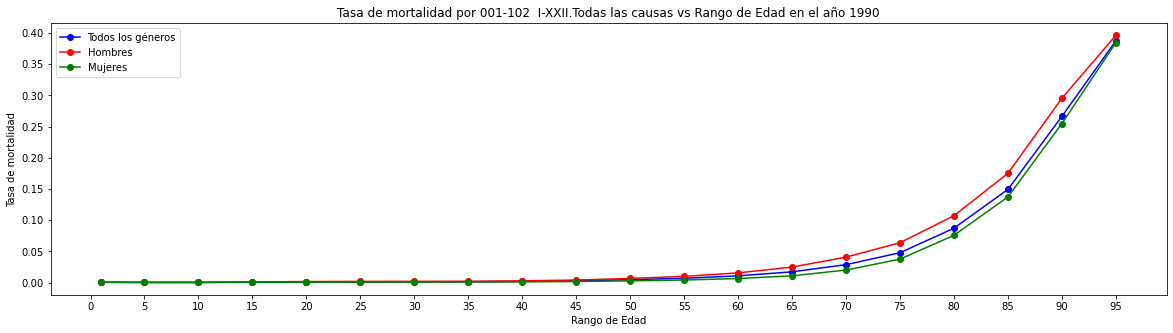

In [101]:
grafico('001-102  I-XXII.Todas las causas', 1990)

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Seguimos utilizado expresiones regulares.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   - Librerías externas.
   
### ¿Se consiguieron los objetivos?

 Por supuesto, los resultados son los deseados y la solución empleada para conseguirlo es sencilla y está compactada en tan solo una función que toma los argumentos pedidos y devuelve las gráficas requeridas. Elaborar este apartado no ha sido especialmente arduo teniendo en cuenta que ya tenemos un buen dataframe que utilizar para ello y que hemos elaborado gráficas previamente durante la práctica.
 
### Ayuda externa:

 En este punto de la tarea ya tengo prácticamente todo el material que necesito para la elaboración del punto.

## h) 1-  Gráfico de Tarta:

  Vamos a elaborar una función que tomando un año, un rango de edades y una lista con causas de muerte elabora un gráfico de tarta que refleje la importancia de cada causa de muerte para ese rango de edad en ese año en concreto.

In [102]:
def grafico_tarta(causas, año, rango):
    
    """
    Función que devuelve un gráfico de tarta con los índices de mortalidad para diferentes causas en un año determinado
    para la población de una determinada edad para los dos sexos.
    
        
    Parameters
    ----------
    causa : list[string]
        Una lista que enumere diversas causas de muerte.
    año : int
        Entero para indicar el año a estudiar.
    rango : string
        String que determina el rango de edades para el estudio.
    
    Returns
    -------
    Devuelve un gráfico de tarta con los índices de mortalidad para diferentes causas en un año determinado
    para la población de una determinada edad para los dos sexos.
    

    """
    
    # Imponemos determinadas condicinoes para filtrar las filas del DF que nos interesan: La edad, el años de estudio y las
    # causas como una lista. Imponemos que se considere el total de los dos sexos.
    
    cond1 = total_DF["Edad"] == rango
    cond2 = total_DF["Periodo"] == año
    cond3 = total_DF["Sexo"] == "Total"
    cond_edad = total_DF["Causa de muerte"].isin(causas)

    
    Tarta_DF = total_DF[cond1 & cond2 & cond3 & cond_edad]
    
    
    # Especificamos las instrucciones para nuestro plot. El tamaño de los gráficos.
    
        
    f = plt.figure() 
    f.set_figwidth(20) 
    f.set_figheight(5)
    
    
    # Y ya estaría, para funcionar la pie chart nos pide basicamente los tamaños de los sectores y sus labels, bastante
    # sencillo. Como la suma de los valores de los tamaño es inferior a 1 tenemos que explicitar que queremos que nos
    # normalice los tamaños y que considere que sumen 1 para así hallar los sectores con tamaños proporcionales a la
    # unidad y poderlos expresar como porcentajes.
     
        
    plt.pie(Tarta_DF["Tasa de mortalidad"],
            labels=Tarta_DF["Causa de muerte"],
            autopct='%1.1f%%',
            normalize = True,
            shadow=False)    
    
    



Vamos a probar la función. Introducimos las causas de muerte como una lista, el año como un integer y un string que identifique el rango de edad.

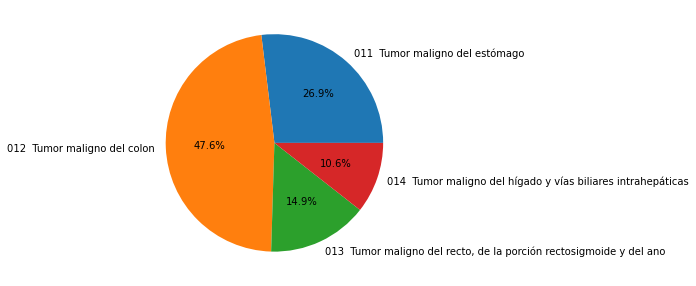

In [103]:
causas = ['011  Tumor maligno del estómago', '012  Tumor maligno del colon', '013  Tumor maligno del recto, de la porción rectosigmoide y del ano', '014  Tumor maligno del hígado y vías biliares intrahepáticas']
grafico_tarta(causas, 2000, '95 y más años')

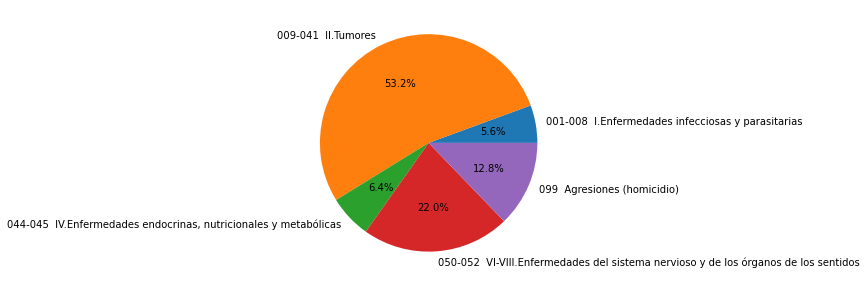

In [104]:
causas = ['001-008  I.Enfermedades infecciosas y parasitarias','099  Agresiones (homicidio)', '009-041  II.Tumores', '044-045  IV.Enfermedades endocrinas, nutricionales y metabólicas', "050-052  VI-VIII.Enfermedades del sistema nervioso y de los órganos de los sentidos"]
grafico_tarta(causas, 2008, 'De 20 a 24 años')

## h) 2-  Causas de muerte más comunes por año y rango de edad:

  Vamos a elaborar una función que nos devuelva las 5 causas de muerte más comunes para un determinado año y rango de edad.

In [105]:
def top(año, rango):
    
    """
    Función que devuelve las 5 causas de muerte junto con sus tasas de mortalidad mayores para un determinado año y rango
    de edad.
    
        
    Parameters
    ----------
    rango : string
        String que determina el rango de edades para el estudio.
    
    Returns
    -------
    Devuelve un DF con las 5 causas de muerte junto con sus tasas de mortalidad mayores para un determinado año y rango
    de edad.
    

    """
    
    # Imponemos determinadas condicinoes para filtrar las filas del DF que nos interesan: La edad, el años de estudio.
    # Imponemos que se considere el total de los dos sexos. Excluimos todas las causas por razones obvias.
    
    cond1 = total_DF["Edad"] == rango
    cond2 = total_DF["Periodo"] == año
    cond3 = total_DF["Sexo"] == "Total"
    cond4 = total_DF["Causa de muerte"] != "001-102  I-XXII.Todas las causas"

    
    Top_DF = total_DF[cond1 & cond2 & cond3 & cond4]
    
    # Y ya casi está, ahora elegimos las columnas e imponemos el orden.
    
    Top_DF_bueno = Top_DF[["Causa de muerte","Tasa de mortalidad", "Tasa de mortalidad %"]].sort_values(by=["Tasa de mortalidad %"],ascending=False)
    
    # En el return limitamos la salida a las 5 primeras filas.
    
    return(Top_DF_bueno.iloc[0:5,:])

In [106]:
top(2000, "De 20 a 24 años")

,Causa de muerte,Tasa de mortalidad,Tasa de mortalidad %
258570,090-102 XX.Causas externas de mortalidad,0.000414,0.041396
261078,090 Accidentes de tráfico,0.000246,0.024618
281142,098 Suicidio y lesiones autoinfligidas,0.000054,0.005434
25326,009-041 II.Tumores,0.000054,0.005434
278634,097 Otros accidentes,0.000034,0.003356


In [107]:
top(1994, "De 40 a 44 años")

,Causa de muerte,Tasa de mortalidad,Tasa de mortalidad %
25484,009-041 II.Tumores,0.000706,0.070630
258728,090-102 XX.Causas externas de mortalidad,0.000335,0.033501
148376,053-061 IX.Enfermedades del sistema circulatorio,0.000328,0.032768
2912,001-008 I.Enfermedades infecciosas y parasita...,0.000185,0.018462
191012,068-072 XI.Enfermedades del sistema digestivo,0.000157,0.015650


## h) 3-  Combinamos las dos funciones anteriores:

  Vamos a elaborar una función que nos devuelva las 5 causas de muerte más comunes para un determinado año y rango de edad.

In [108]:
def top_tartas(año):
    
    """
    Función que devuelve las 5 causas de muerte en un gráfico de tarta para cada rango de edades en un año dado. Se utiliza
    la función top elaborada previamente.
    
        
    Parameters
    ----------
    año : int
        Año del estudio.
    
    Returns
    -------
    Devuelve una colección de diagramas de tarta con las 5 principales causas de muerte para cada rango de edad en ese año.
    

    """
    
    # Extraemos una lista con todos los posibles rangos de edad para irla recorriendo en un bucle.
    
    edades = total_DF.drop_duplicates(["Edad"])[["Edad"]]
    lista_edades = edades["Edad"].to_list()
    
    # Planteamos el bucle sobre estos rangos de edad. Utilizaremos la funcion top elaborada anteriormente para construir
    # las listas de causas más importantes, tras ellos las metemos en un gráfico de tarta declarando las columnas
    # con las magnitudes a representar y los labels como en el apartado anterior.
    
    # Es importante notar que tenemos que declarar plt.figure() en cada iteración del bucle para que cree una nueva figura
    # cada vez, si no las va a superponer todas. Hemos puesto un argumento para insertar el título, como no funciona
    # exactamente igual que un print he tomado la opción de elaborar una lista con los elementos que quiero en el título
    # y luego con una función join construir un string con cada uno de estos elementos casteado como string y separado
    # de los siguientes por un espacio.
    
    for i in lista_edades:
        temp_DF =  top(año, i)
        
        titulo = ["Mayores causas de muerte para el rango de edades:", i, "en el año", año]
        
        f = plt.figure() 
        f.set_figwidth(20) 
        f.set_figheight(5)
        
        plt.pie(temp_DF["Tasa de mortalidad"],
            labels=temp_DF["Causa de muerte"],
            autopct='%1.1f%%',
            normalize = True,
            shadow=False)
        
        plt.title(" ".join([str(elem) for elem in titulo]))
        

Lanzamos la función, por ejemplo con el año 2000

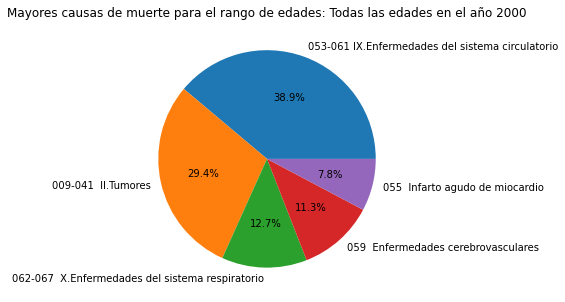

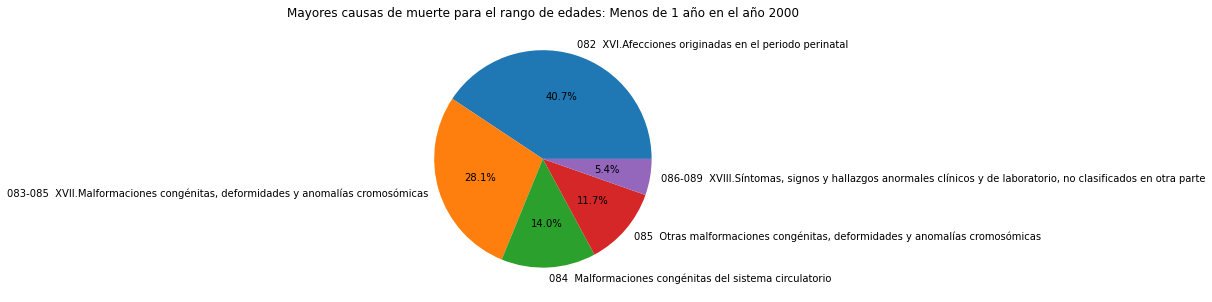

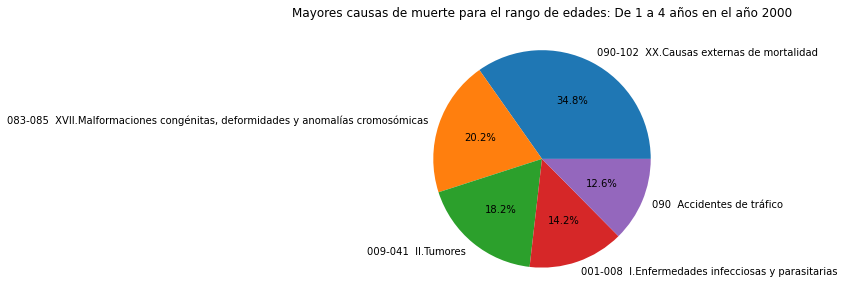

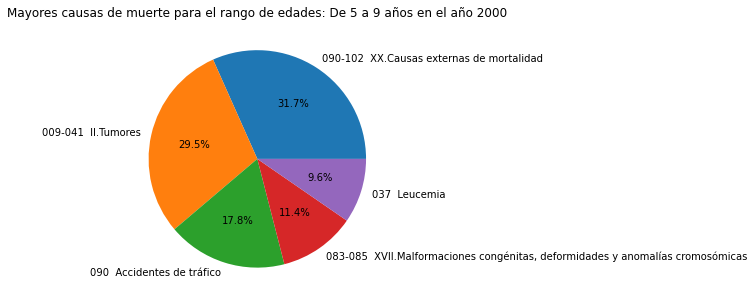

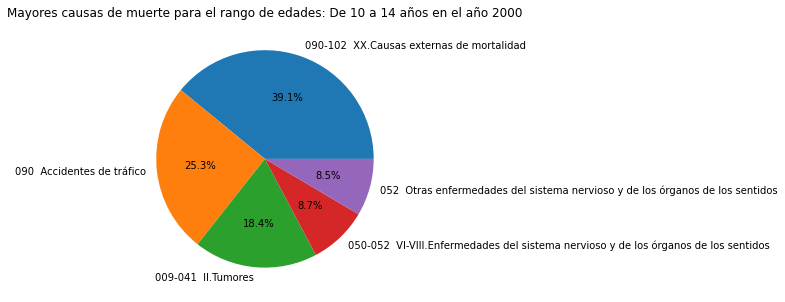

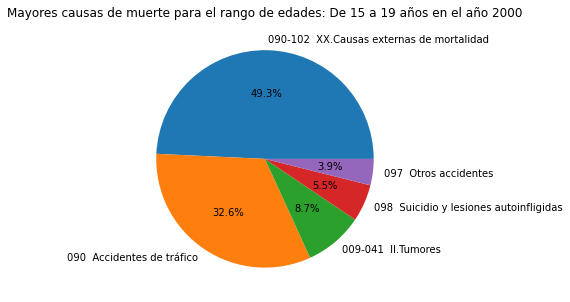

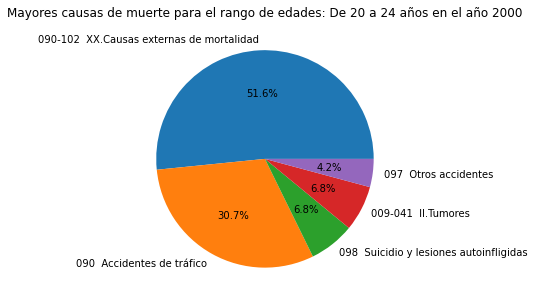

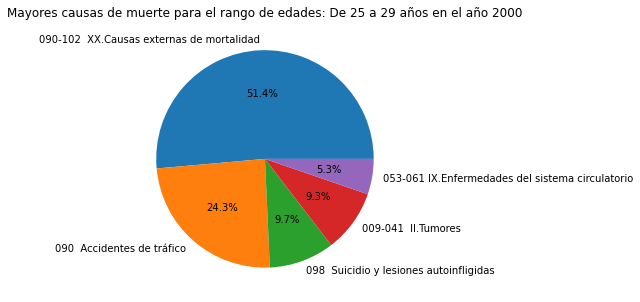

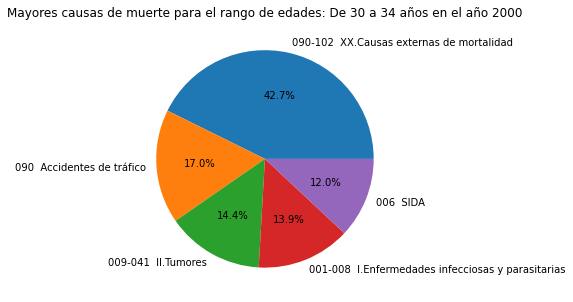

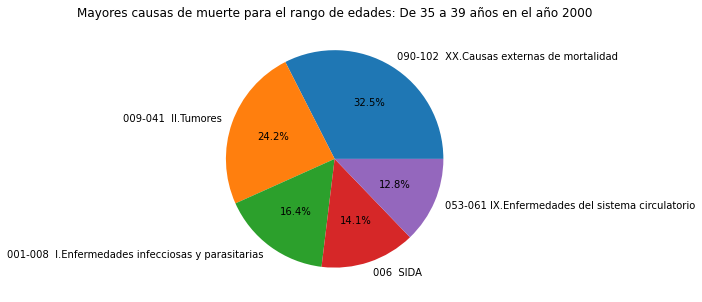

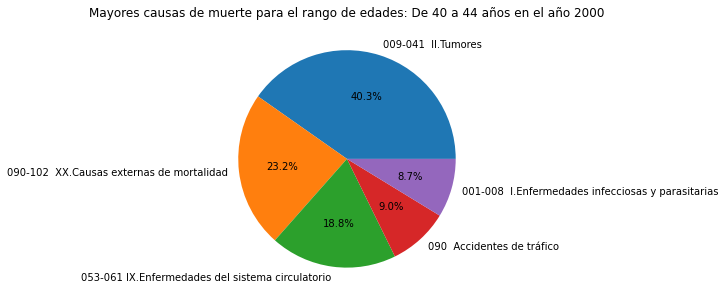

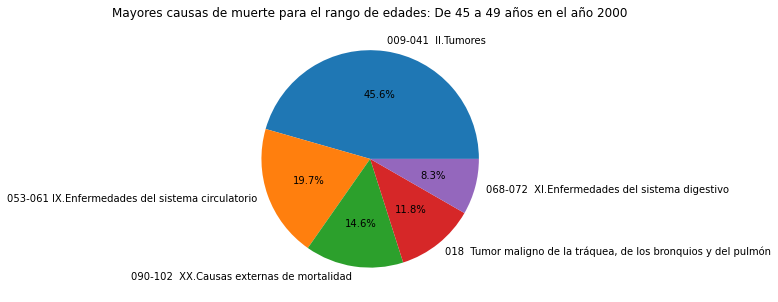

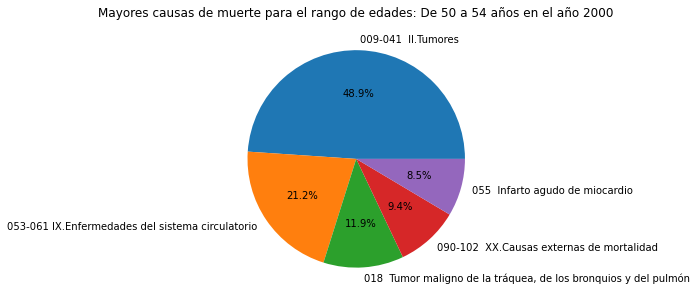

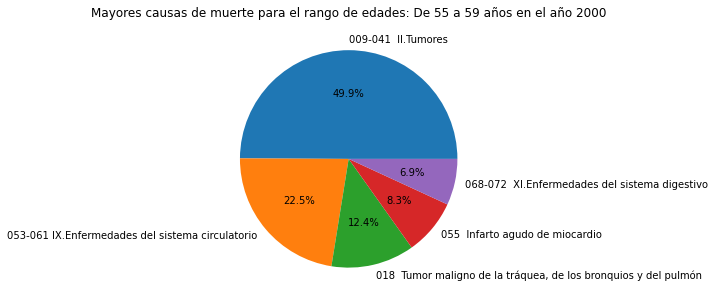

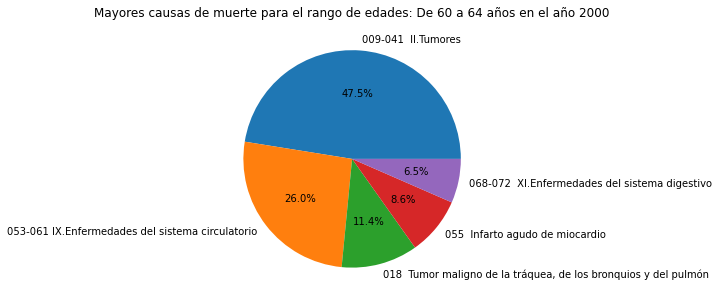

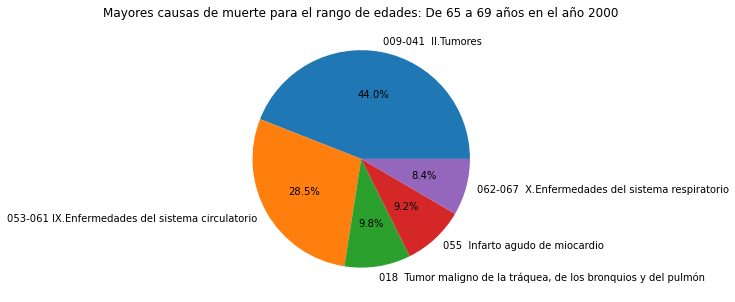

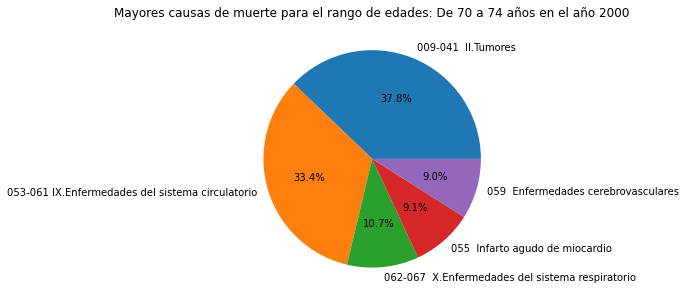

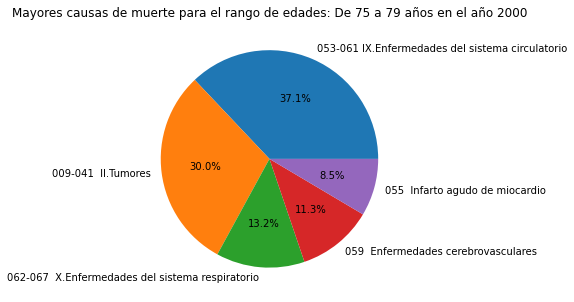

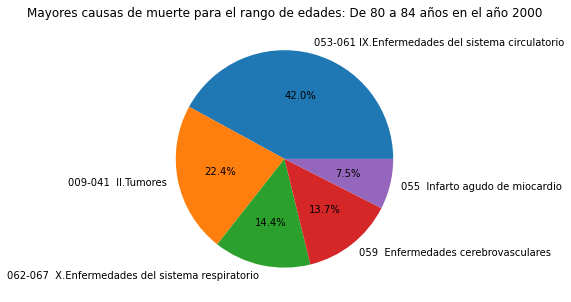

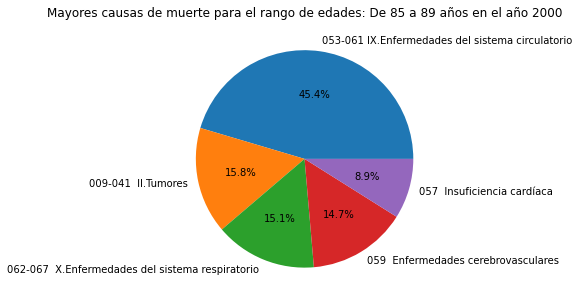

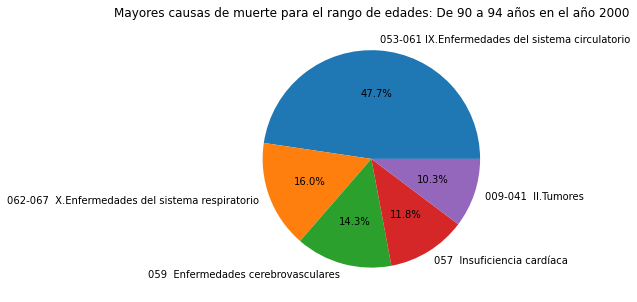

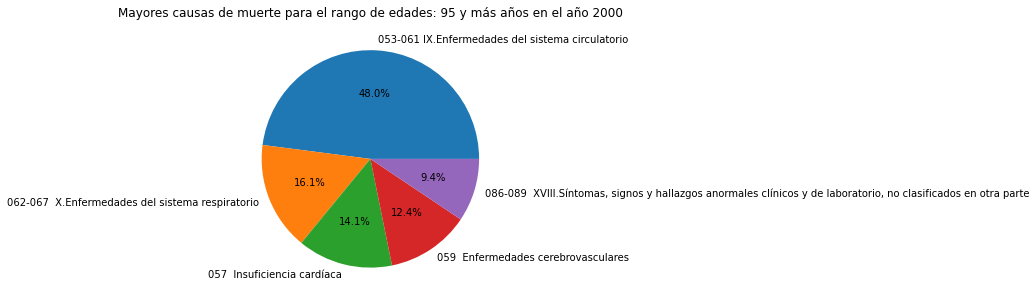

In [109]:
top_tartas(2000)

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Funciones de primer y segunda orden.
   - Listas intensionales y manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   - Manejo de los gráficos del paquete Pyplot.
   - Librerías externas.
   
### ¿Se consiguieron los objetivos?

 Sí, los resultados son satisfactorios, se han elaborado los tres subapartados con los resultados deseados, funcionan bien, con sintaxis concisa y clara. Aparte de que podría optimizarse algún aspecto no veo errores groseros.
 
### Ayuda externa:

 Algo de documentación sobre gráficos de tarta por internet que no tenemos en la documentación del curso.

## i) Número de fallecimientos por cada causa en un año:

  Vamos a elaborar un programa iterativo que vaya recorriendo nuestro DF, y para un año dado como argumento, descarte las referentes a hombres o mujeres (se quede solo con las del total de los dos sexos), considere solo el total de todas las edades y de el número de muertes para cada causa.

In [110]:
def cuentamuertes(año):
    
    # Vamos a hacer el proceso desde el principio, por lo que comenzamos importando de nuevo el CSV original.
    
    DF = pd.read_csv("ine_mortalidad_espanna.csv", delimiter = ";",dtype = {"Total": str})
    
    # Reemplazamos las apariciones de "." por nada utilizando expresiones regulares.
    
    DF["Total"] = DF["Total"].replace(regex=["\."],value="")
    
    # Tras ello, casteamos la columna objetivo como enteros y el resto como sus tipos deseados.
    
    DF = DF.astype({"Causa de muerte":"string", "Sexo":"string", "Edad":"string", "Periodo":"int32","Total": "int64"})
    
    # Yo he optado por crear dos listas vacías a donde vayamos agregando los datos que nos interesen y luego insgresarlas
    # como los datos de las columnas del dataframe que daremos como resultado.
    
    Causa_muerte = []
    Total_muertes = []
    
    # Ahora elaboramos un bucle que vaya recorriendo el DataFrame, y de las columnas que cumplan las condiciones
    # que nos interesan vaya añadiendo a las listas la causa y el total de fallecidos.

    
    for i in range(len(DF)):
        if DF.loc[i,"Periodo"] == año and DF.loc[i,"Sexo"] == "Total" and DF.loc[i,"Edad"] == "Todas las edades":
            Causa_muerte.append(DF.loc[i,"Causa de muerte"])
            Total_muertes.append(DF.loc[i,"Total"])
            
    # Ahora elaboramos un DataFrame poniendo como valores de las columnas las dos listas que hemos ido elaborando.
            
    datos = {'Causa':  Causa_muerte,
             'Total de muertes': Total_muertes}
            
    Resultado = pd.DataFrame(datos, columns = ['Causa','Total de muertes'])
    
    return(Resultado)
            
        

In [111]:
DF_i = cuentamuertes(2000)

Podemos mostrar el resultado

In [112]:
DF_i

,Causa,Total de muertes
0,001-102 I-XXII.Todas las causas,360391
1,001-008 I.Enfermedades infecciosas y parasita...,6284
2,001 Enfermedades infecciosas intestinales,320
3,002 Tuberculosis y sus efectos tardíos,520
4,003 Enfermedad meningocócica,84
...,...,...
112,098 Suicidio y lesiones autoinfligidas,3393
113,099 Agresiones (homicidio),411
114,100 Eventos de intención no determinada,98
115,101 Complicaciones de la atención médica y qu...,358


Para ver que están recogidas todas las causas de muerte podemos comparar las diferentes causas de nuestro DF con el original y ver que tienen el mismo número. Adicionalmente como el número de causas diferentes en nuestro resultado coincide con el número de filas podemos saber que no hay ninguna causa repetida.

In [113]:
aux = DF_i.drop_duplicates(["Causa"])[["Causa"]]
lista = aux["Causa"].to_list()
len(lista)

117

In [114]:
DF = pd.read_csv("ine_mortalidad_espanna.csv", delimiter = ";",dtype = {"Total": str})
aux = DF.drop_duplicates(["Causa de muerte"])[["Causa de muerte"]]
lista = aux["Causa de muerte"].to_list()
len(lista)

117

### Técnicas empleadas en los distintos apartados:

   - Funciones con los parámetros deseados y definidas correctamente con sus descripciones.
   - Manejo de listas.
   - Bucles y condicionales.
   - Manejo de Pandas dataframes.
   
### ¿Se consiguieron los objetivos?

 Sí, los resultados son los deseados, desde una importación de 0 del CSV solo declarando bien los tipos podemos elaborar una función iterativa que recorra el DF y consiga extraer los datos que necesitamos de manera correcta. El resultado también presenta buen rendimiento.
